# **Shopper Spectrum: Customer Segmentation Analysis**

### **Goal**
#### The goal of this project is to perform customer segmentation analysis on online retail transaction data to identify distinct customer groups based on their purchasing behavior. By leveraging RFM (Recency, Frequency, Monetary) analysis and clustering techniques, we aim to uncover insights that can help improve marketing strategies and enhance customer engagement.

### **Project Overview**
#### This project analyzes online retail transaction data to understand customer behavior and segment customers based on their purchasing patterns. We'll use RFM (Recency, Frequency, Monetary) analysis and machine learning clustering techniques to identify distinct customer segments.

### **Key Features**
#### - **RFM Analysis**: Calculate Recency, Frequency, and Monetary values for each customer
#### - **Clustering**: Use K-Means and Hierarchical clustering to identify customer segments
#### - **Visualization**: Create visual representations of customer segments and behaviors
#### - **Insights**: Generate actionable insights to improve marketing strategies and customer engagement
#### - **Tools**: Python, Pandas, Matplotlib, Seaborn, Scikit-learn
#### - **Data Source**: Online Retail Dataset provided in Internship program


### **Dataset Information**
#### - **Source**: Online Retail Dataset
#### - **Records**: 541,911 transactions
#### - **Period**: 2022 retail data
#### - **Customers**: 4,372 unique customers
#### - **Countries**: 38 different countries

### **Objectives**
#### 1. Perform comprehensive exploratory data analysis
#### 2. Create customer segments using RFM analysis
#### 3. Apply machine learning clustering techniques
#### 4. Analyze customer behavior patterns
#### 5. Generate actionable business insights

## ---------------------------------------------------------------------------------------------------------

## ***1. Import Required Libraries***

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Date and time
from datetime import datetime, timedelta
import calendar

# Statistics
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('ggplot')

print("All libraries imported successfully!")

All libraries imported successfully!


## ---------------------------------------------------------------------------------------------------------

## ***2. Load and Explore the Dataset***

In [3]:
# Load the dataset
df = pd.read_csv('online_retail.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
missing_info = df.isnull().sum()
missing_percent = (missing_info / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_info,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_df)

print("\n=== UNIQUE VALUES ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique():,} unique values")

print("\n=== SAMPLE DATA ===")
df.info()

=== DATASET OVERVIEW ===
Total records: 541,909
Total columns: 8
Memory usage: 175.20 MB

=== DATA TYPES ===
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

=== MISSING VALUES ===
             Missing Count  Missing Percentage
CustomerID          135080           24.926694
Description           1454            0.268311
StockCode                0            0.000000
InvoiceNo                0            0.000000
Quantity                 0            0.000000
InvoiceDate              0            0.000000
UnitPrice                0            0.000000
Country                  0            0.000000

=== UNIQUE VALUES ===
InvoiceNo: 25,900 unique values
StockCode: 4,070 unique values
Description: 4,223 unique values
Quantity: 722 unique values
InvoiceDate: 23,260 unique values
UnitPrice: 1,630 unique values
CustomerID: 4,372 unique values
Co

## ---------------------------------------------------------------------------------------------------------

## ***3. Data Preprocessing and Cleaning***

In [5]:
# Create a copy for preprocessing
df_clean = df.copy()

print("=== BEFORE CLEANING ===")
print(f"Total records: {len(df_clean):,}")

# 1. Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# 2. Remove records with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])
print(f"After removing missing CustomerID: {len(df_clean):,}")

# 3. Remove records with negative or zero quantities and unit prices
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"After removing invalid quantities/prices: {len(df_clean):,}")

# 4. Remove cancelled transactions (those starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
print(f"After removing cancelled transactions: {len(df_clean):,}")

# 5. Create derived features
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek
df_clean['MonthName'] = df_clean['InvoiceDate'].dt.month_name()
df_clean['DayName'] = df_clean['InvoiceDate'].dt.day_name()

# 6. Remove outliers based on TotalAmount (using IQR method)
Q1 = df_clean['TotalAmount'].quantile(0.25)
Q3 = df_clean['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Total amount range before outlier removal: ${df_clean['TotalAmount'].min():.2f} - ${df_clean['TotalAmount'].max():.2f}")
df_clean = df_clean[(df_clean['TotalAmount'] >= lower_bound) & (df_clean['TotalAmount'] <= upper_bound)]
print(f"After removing outliers: {len(df_clean):,}")
print(f"Total amount range after outlier removal: ${df_clean['TotalAmount'].min():.2f} - ${df_clean['TotalAmount'].max():.2f}")

print("\n=== AFTER CLEANING ===")
print(f"Final dataset shape: {df_clean.shape}")
print(f"Date range: {df_clean['InvoiceDate'].min()} to {df_clean['InvoiceDate'].max()}")
print(f"Unique customers: {df_clean['CustomerID'].nunique():,}")
print(f"Unique products: {df_clean['StockCode'].nunique():,}")
print(f"Unique countries: {df_clean['Country'].nunique():,}")

df_clean.head()

=== BEFORE CLEANING ===
Total records: 541,909
After removing missing CustomerID: 406,829
After removing invalid quantities/prices: 397,884
After removing cancelled transactions: 397,884
Total amount range before outlier removal: $0.00 - $168469.60
After removing outliers: 366,643
Total amount range after outlier removal: $0.00 - $42.45

=== AFTER CLEANING ===
Final dataset shape: (366643, 16)
Date range: 2022-12-01 08:26:00 to 2023-12-09 12:50:00
Unique customers: 4,194
Unique products: 3,642
Unique countries: 37


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,DayOfWeek,MonthName,DayName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022,12,1,8,3,December,Thursday
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3,December,Thursday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022,12,1,8,3,December,Thursday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3,December,Thursday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3,December,Thursday


## ---------------------------------------------------------------------------------------------------------

## ***4. Exploratory Data Analysis (EDA)***

## *4.1 Sales Trends Over Time*

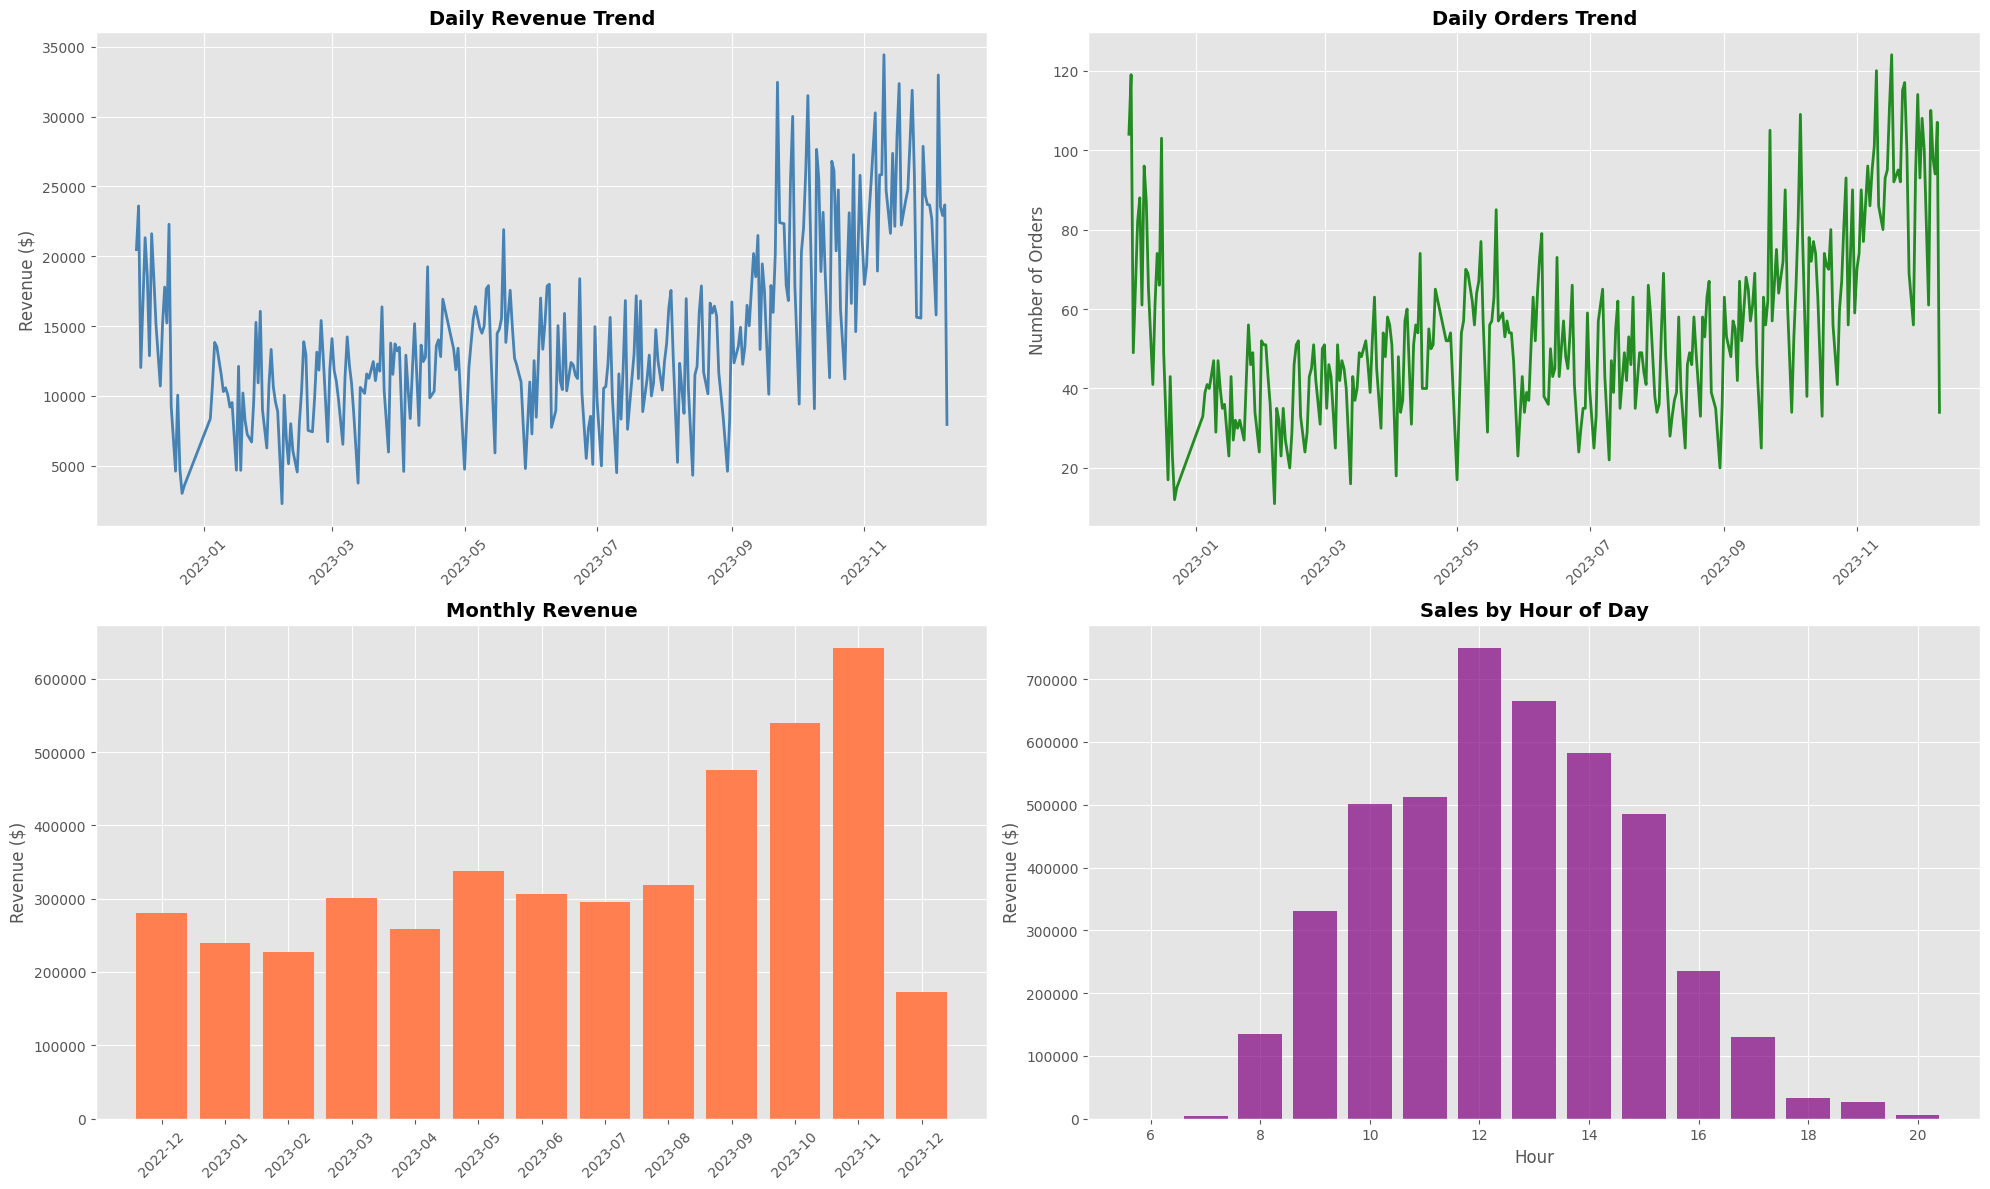

=== SALES SUMMARY ===
Total Revenue: $4,396,136.23
Average Order Value: $261.58
Peak Sales Day: 2023-11-10
Peak Sales Hour: 12:00


In [6]:
# Daily sales trends
daily_sales = df_clean.groupby(df_clean['InvoiceDate'].dt.date).agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

daily_sales.columns = ['Date', 'Total_Revenue', 'Total_Orders', 'Unique_Customers']

# Monthly sales trends
monthly_sales = df_clean.groupby(['Year', 'Month']).agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Daily revenue trend
axes[0, 0].plot(daily_sales['Date'], daily_sales['Total_Revenue'], color='steelblue', linewidth=2)
axes[0, 0].set_title('Daily Revenue Trend', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Daily orders trend
axes[0, 1].plot(daily_sales['Date'], daily_sales['Total_Orders'], color='forestgreen', linewidth=2)
axes[0, 1].set_title('Daily Orders Trend', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].tick_params(axis='x', rotation=45)

# Monthly revenue - Fix the formatting error
monthly_labels = [f"{int(row['Year'])}-{int(row['Month']):02d}" for _, row in monthly_sales.iterrows()]
axes[1, 0].bar(monthly_labels, monthly_sales['TotalAmount'], color='coral')
axes[1, 0].set_title('Monthly Revenue', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Revenue ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Hourly sales pattern
hourly_sales = df_clean.groupby('Hour')['TotalAmount'].sum()
axes[1, 1].bar(hourly_sales.index, hourly_sales.values, color='purple', alpha=0.7)
axes[1, 1].set_title('Sales by Hour of Day', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Revenue ($)')

plt.tight_layout()
plt.show()

print("=== SALES SUMMARY ===")
print(f"Total Revenue: ${df_clean['TotalAmount'].sum():,.2f}")
print(f"Average Order Value: ${df_clean.groupby('InvoiceNo')['TotalAmount'].sum().mean():.2f}")
print(f"Peak Sales Day: {daily_sales.loc[daily_sales['Total_Revenue'].idxmax(), 'Date']}")
print(f"Peak Sales Hour: {hourly_sales.idxmax()}:00")

## *4.2 Product Analysis*

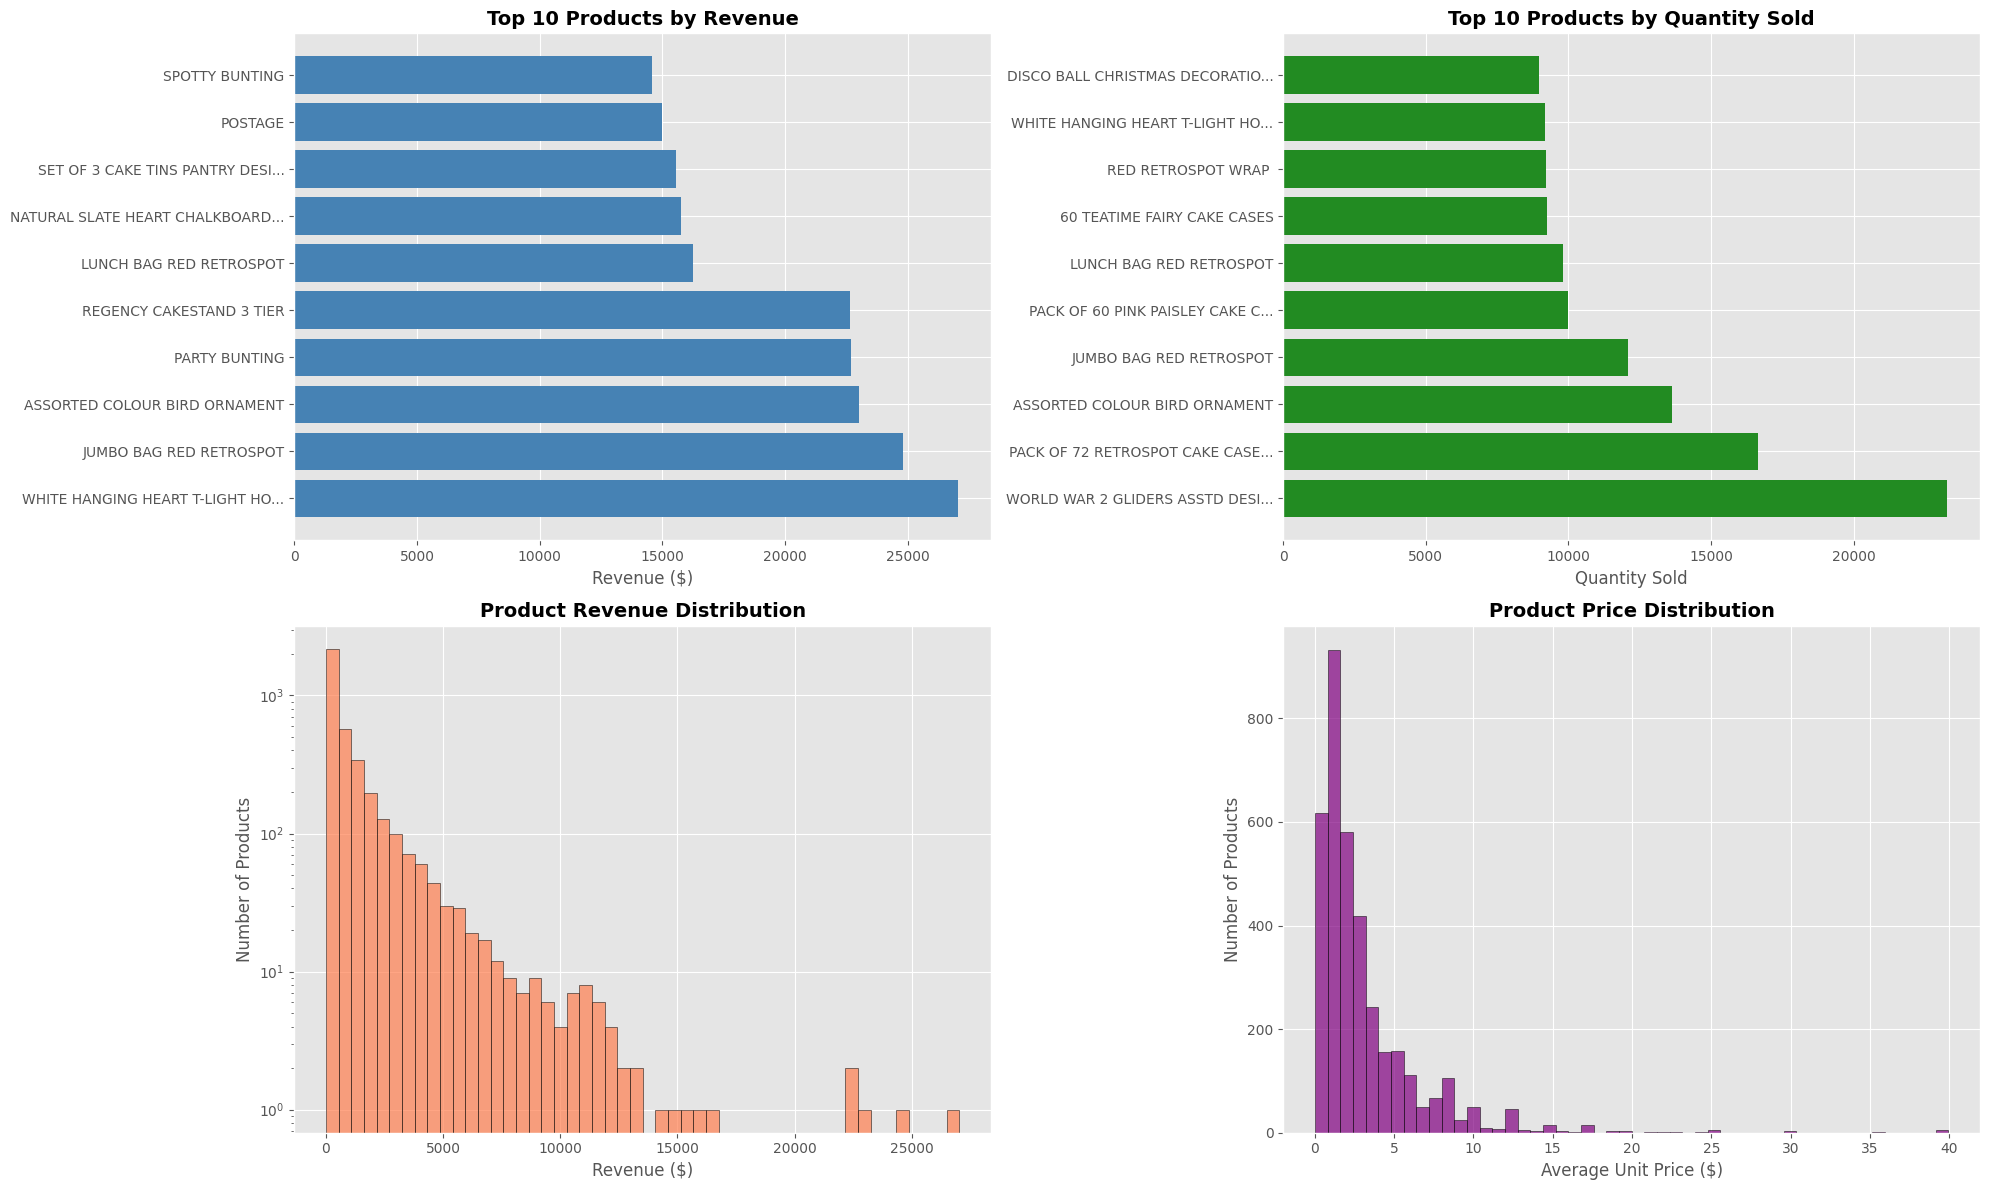

=== PRODUCT INSIGHTS ===
Total unique products: 3,642
Average product price: $2.75
Most expensive product: $40.46
Cheapest product: $0.00

Top product by revenue: WHITE HANGING HEART T-LIGHT HOLDER ($27,031.26)
Top product by quantity: WORLD WAR 2 GLIDERS ASSTD DESIGNS (23,263 units)

=== TOP 10 PRODUCTS BY REVENUE ===
                       Description  Total_Revenue  Total_Quantity
WHITE HANGING HEART T-LIGHT HOLDER       27031.26            9170
           JUMBO BAG RED RETROSPOT       24784.14           12100
     ASSORTED COLOUR BIRD ORNAMENT       23016.11           13619
                     PARTY BUNTING       22670.19            4589
          REGENCY CAKESTAND 3 TIER       22655.26            1778
           LUNCH BAG RED RETROSPOT       16229.45            9797
   NATURAL SLATE HEART CHALKBOARD        15750.36            5308
 SET OF 3 CAKE TINS PANTRY DESIGN        15544.23            3133
                           POSTAGE       14962.27             795
                   

In [7]:
# Product analysis
product_stats = df_clean.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

product_stats.columns = ['StockCode', 'Description', 'Total_Quantity', 'Total_Revenue', 'Orders', 'Customers']
product_stats = product_stats.sort_values('Total_Revenue', ascending=False)

# Top products by different metrics
top_products_revenue = product_stats.head(10)
top_products_quantity = product_stats.sort_values('Total_Quantity', ascending=False).head(10)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Top 10 products by revenue
axes[0, 0].barh(range(len(top_products_revenue)), top_products_revenue['Total_Revenue'], color='steelblue')
axes[0, 0].set_yticks(range(len(top_products_revenue)))
axes[0, 0].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc 
                           for desc in top_products_revenue['Description']], fontsize=10)
axes[0, 0].set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Revenue ($)')

# Top 10 products by quantity
axes[0, 1].barh(range(len(top_products_quantity)), top_products_quantity['Total_Quantity'], color='forestgreen')
axes[0, 1].set_yticks(range(len(top_products_quantity)))
axes[0, 1].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc 
                           for desc in top_products_quantity['Description']], fontsize=10)
axes[0, 1].set_title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Quantity Sold')

# Revenue distribution
axes[1, 0].hist(product_stats['Total_Revenue'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Product Revenue Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Revenue ($)')
axes[1, 0].set_ylabel('Number of Products')
axes[1, 0].set_yscale('log')

# Price distribution
price_stats = df_clean.groupby('StockCode')['UnitPrice'].mean()
axes[1, 1].hist(price_stats, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Product Price Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Unit Price ($)')
axes[1, 1].set_ylabel('Number of Products')

plt.tight_layout()
plt.show()

print("=== PRODUCT INSIGHTS ===")
print(f"Total unique products: {df_clean['StockCode'].nunique():,}")
print(f"Average product price: ${df_clean['UnitPrice'].mean():.2f}")
print(f"Most expensive product: ${df_clean['UnitPrice'].max():.2f}")
print(f"Cheapest product: ${df_clean['UnitPrice'].min():.2f}")
print(f"\nTop product by revenue: {top_products_revenue.iloc[0]['Description']} (${top_products_revenue.iloc[0]['Total_Revenue']:,.2f})")
print(f"Top product by quantity: {top_products_quantity.iloc[0]['Description']} ({top_products_quantity.iloc[0]['Total_Quantity']:,} units)")

# Display top products
print("\n=== TOP 10 PRODUCTS BY REVENUE ===")
print(top_products_revenue[['Description', 'Total_Revenue', 'Total_Quantity']].to_string(index=False))

## *4.3 Geographical Analysis*

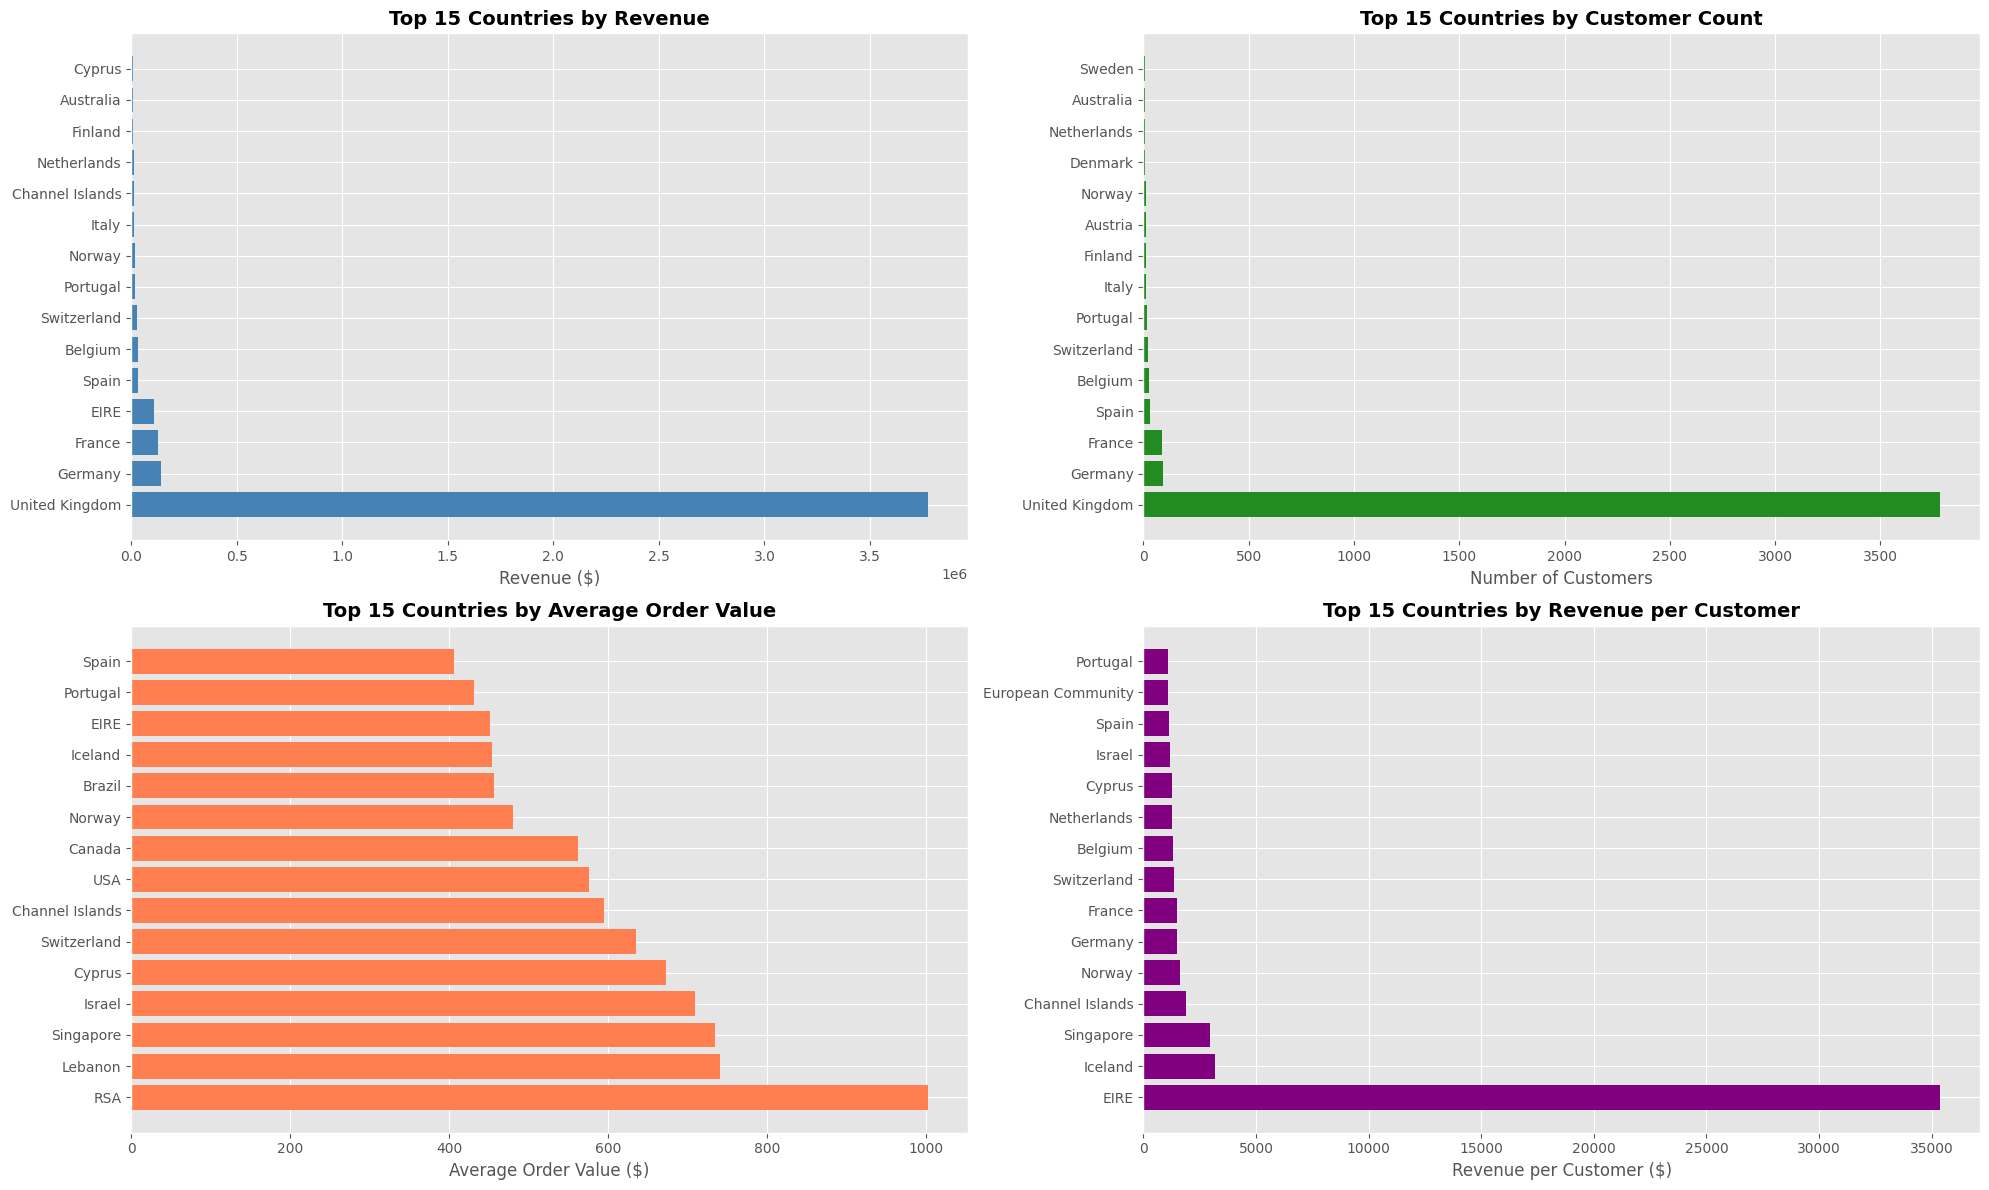

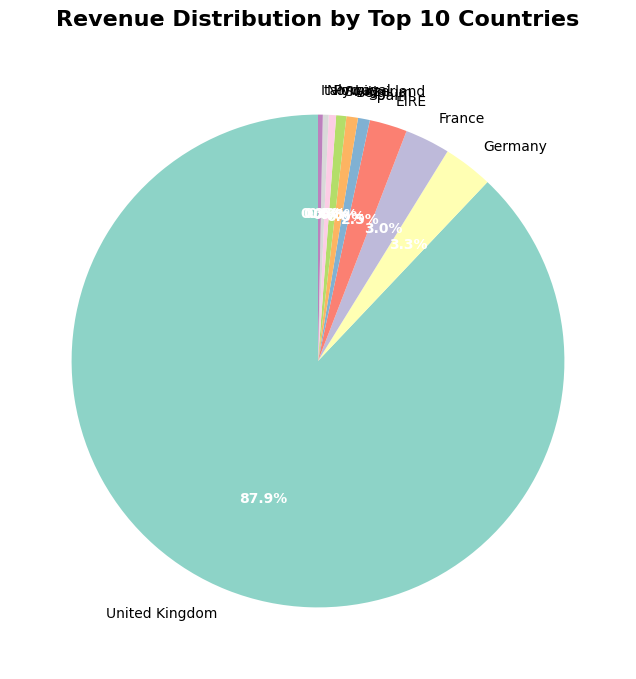

=== GEOGRAPHICAL INSIGHTS ===
Total countries: 37
Top country by revenue: United Kingdom ($3,773,730.24)
UK revenue share: 85.8%

=== TOP 10 COUNTRIES BY REVENUE ===
       Country  Total_Revenue  Unique_Customers  Avg_Order_Value
United Kingdom    3773730.244              3784       250.280557
       Germany     139765.520                93       317.648909
        France     126993.560                86       339.554973
          EIRE     106134.210                 3       451.634936
         Spain      33359.940                29       406.828537
       Belgium      32522.790                25       331.865204
   Switzerland      28601.200                21       635.582222
      Portugal      20680.280                19       430.839167
        Norway      16352.050                10       480.942647
         Italy      13407.400                14       394.335294


In [8]:
# Country-wise analysis
country_stats = df_clean.groupby('Country').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

country_stats.columns = ['Country', 'Total_Revenue', 'Total_Orders', 'Unique_Customers', 'Total_Quantity']
country_stats['Avg_Order_Value'] = country_stats['Total_Revenue'] / country_stats['Total_Orders']
country_stats['Revenue_Per_Customer'] = country_stats['Total_Revenue'] / country_stats['Unique_Customers']
country_stats = country_stats.sort_values('Total_Revenue', ascending=False)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Top 15 countries by revenue
top_countries = country_stats.head(15)
axes[0, 0].barh(range(len(top_countries)), top_countries['Total_Revenue'], color='steelblue')
axes[0, 0].set_yticks(range(len(top_countries)))
axes[0, 0].set_yticklabels(top_countries['Country'], fontsize=10)
axes[0, 0].set_title('Top 15 Countries by Revenue', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Revenue ($)')

# Top 15 countries by number of customers
top_countries_customers = country_stats.sort_values('Unique_Customers', ascending=False).head(15)
axes[0, 1].barh(range(len(top_countries_customers)), top_countries_customers['Unique_Customers'], color='forestgreen')
axes[0, 1].set_yticks(range(len(top_countries_customers)))
axes[0, 1].set_yticklabels(top_countries_customers['Country'], fontsize=10)
axes[0, 1].set_title('Top 15 Countries by Customer Count', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Customers')

# Average order value by country (top 15)
top_countries_aov = country_stats.sort_values('Avg_Order_Value', ascending=False).head(15)
axes[1, 0].barh(range(len(top_countries_aov)), top_countries_aov['Avg_Order_Value'], color='coral')
axes[1, 0].set_yticks(range(len(top_countries_aov)))
axes[1, 0].set_yticklabels(top_countries_aov['Country'], fontsize=10)
axes[1, 0].set_title('Top 15 Countries by Average Order Value', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Average Order Value ($)')

# Revenue per customer (top 15)
top_countries_rpc = country_stats.sort_values('Revenue_Per_Customer', ascending=False).head(15)
axes[1, 1].barh(range(len(top_countries_rpc)), top_countries_rpc['Revenue_Per_Customer'], color='purple')
axes[1, 1].set_yticks(range(len(top_countries_rpc)))
axes[1, 1].set_yticklabels(top_countries_rpc['Country'], fontsize=10)
axes[1, 1].set_title('Top 15 Countries by Revenue per Customer', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Revenue per Customer ($)')

plt.tight_layout()
plt.show()

# Pie chart for top countries using matplotlib instead of Plotly
fig_pie, ax_pie = plt.subplots(figsize=(12, 8))
top_10_countries = top_countries.head(10)

# Create pie chart
colors = plt.cm.Set3(range(len(top_10_countries)))
wedges, texts, autotexts = ax_pie.pie(
    top_10_countries['Total_Revenue'], 
    labels=top_10_countries['Country'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)

# Improve text formatting
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

ax_pie.set_title('Revenue Distribution by Top 10 Countries', fontsize=16, fontweight='bold', pad=20)
plt.show()

print("=== GEOGRAPHICAL INSIGHTS ===")
print(f"Total countries: {len(country_stats)}")
print(f"Top country by revenue: {country_stats.iloc[0]['Country']} (${country_stats.iloc[0]['Total_Revenue']:,.2f})")
print(f"UK revenue share: {(country_stats[country_stats['Country'] == 'United Kingdom']['Total_Revenue'].sum() / country_stats['Total_Revenue'].sum() * 100):.1f}%")

print("\n=== TOP 10 COUNTRIES BY REVENUE ===")
print(country_stats.head(10)[['Country', 'Total_Revenue', 'Unique_Customers', 'Avg_Order_Value']].to_string(index=False))

## ---------------------------------------------------------------------------------------------------------

## ***5. Feature Engineering for Customer Segmentation***

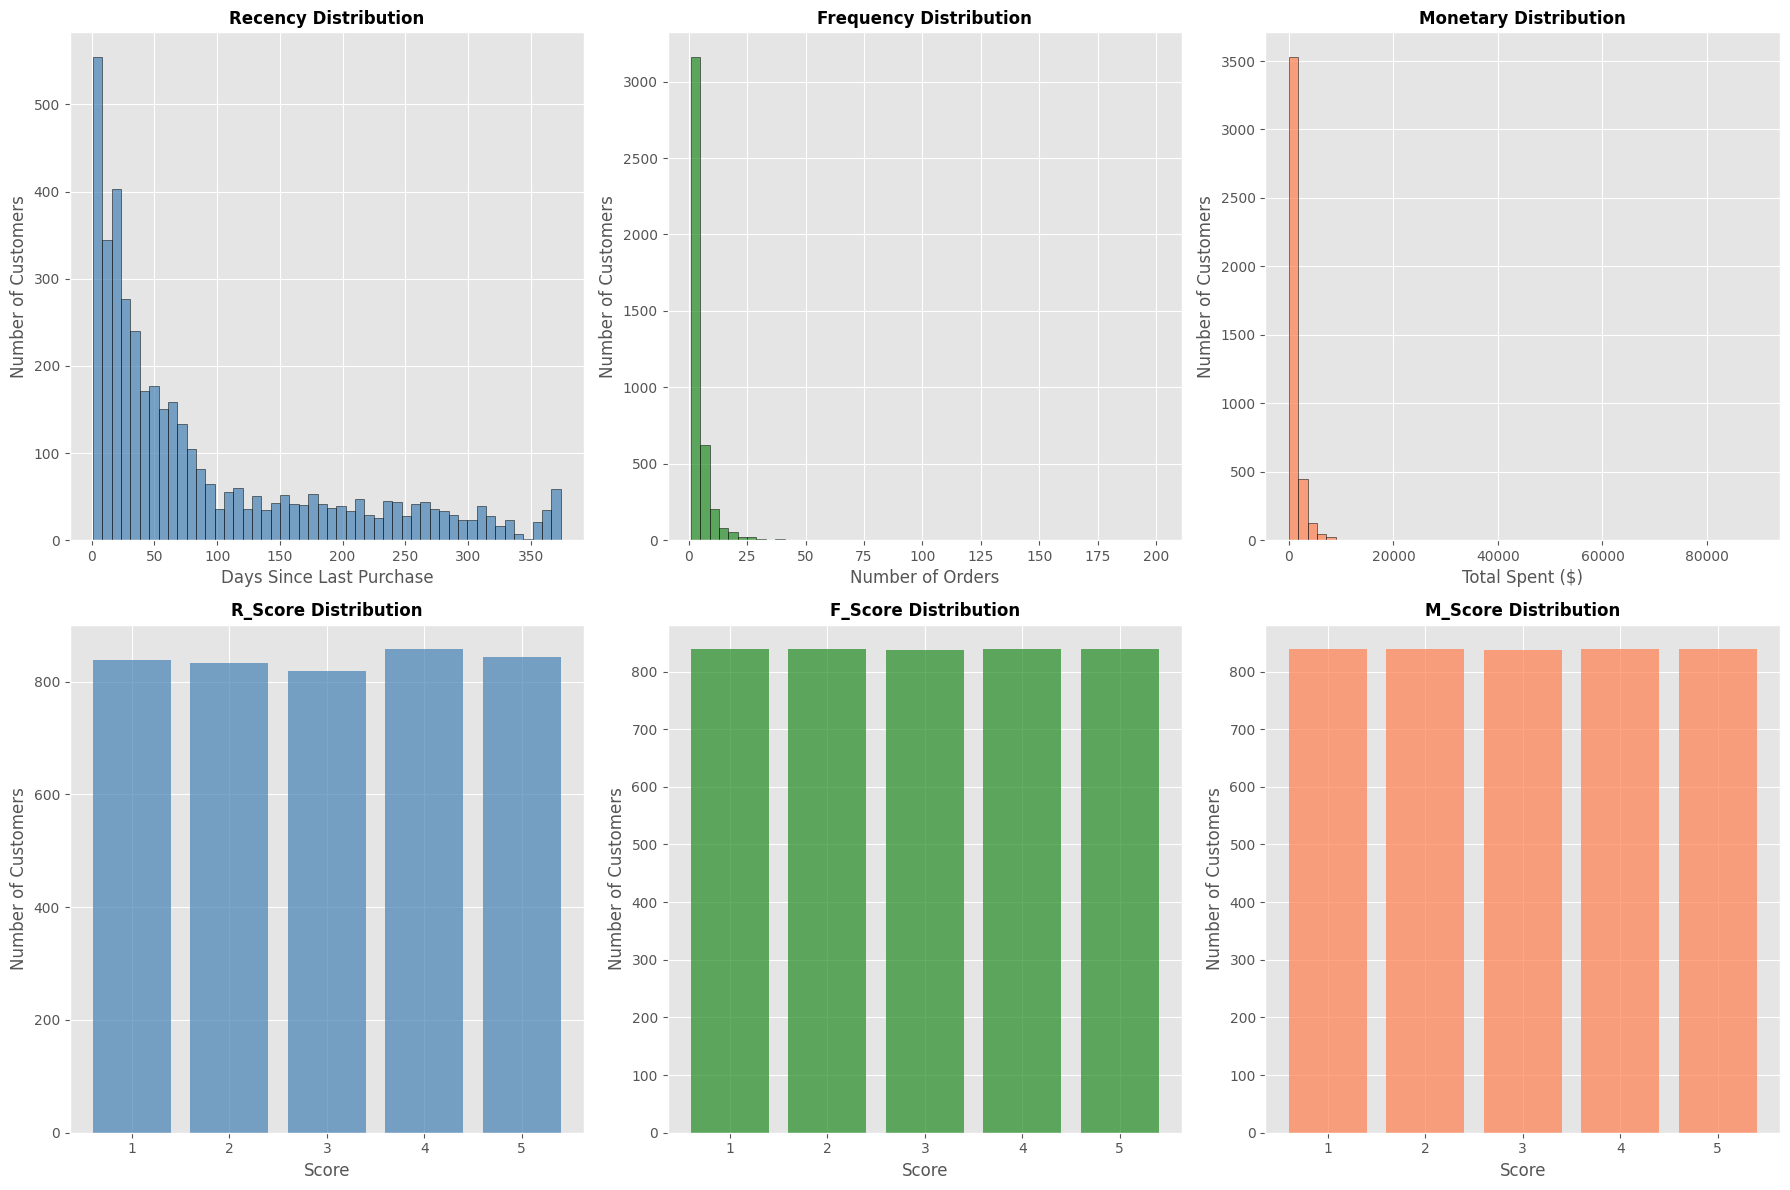

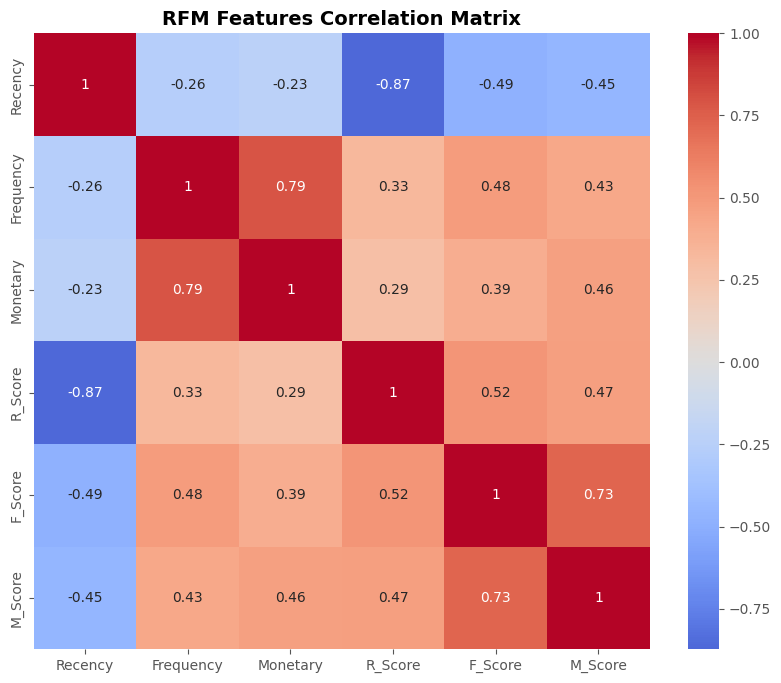

=== RFM ANALYSIS SUMMARY ===
Total customers: 4,194
Average Recency: 92.6 days
Average Frequency: 4.0 orders
Average Monetary: $1048.20
Average Customer Lifetime: 128.2 days

=== RFM QUARTILE STATISTICS ===

Recency:
  Q1: 18.00
  Q2: 51.00
  Q3: 144.00

Frequency:
  Q1: 1.00
  Q2: 2.00
  Q3: 4.00

Monetary:
  Q1: 223.98
  Q2: 497.44
  Q3: 1192.07


,CustomerID,Recency,Frequency,Monetary,Total_Quantity,Avg_Quantity_Per_Order,Avg_Unit_Price,Unique_Products,Country,First_Purchase,Last_Purchase,Avg_Order_Value,Order_Value_Std,Customer_Lifetime,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Numeric
0,12347.0,2,7,3174.62,1948,11.595238,2.528810,99,Iceland,2022-12-07 14:57:00,2023-12-07 15:52:00,18.896548,8.001073,365,5,5,5,555,15
1,12348.0,75,4,601.64,1271,66.894737,6.730526,17,Finland,2022-12-16 19:09:00,2023-09-25 13:13:00,31.665263,12.586040,282,2,4,3,243,9
2,12349.0,19,1,1145.35,530,8.030303,4.018182,66,Italy,2023-11-21 09:51:00,2023-11-21 09:51:00,17.353788,6.030290,0,4,1,4,414,9
3,12350.0,310,1,334.40,197,11.588235,3.841176,17,Norway,2023-02-02 16:01:00,2023-02-02 16:01:00,19.670588,7.275538,0,1,1,2,112,4
4,12352.0,36,7,1505.74,529,6.612500,5.422625,58,Norway,2023-02-16 12:33:00,2023-11-03 14:37:00,18.821750,6.382172,260,3,5,5,355,13


In [9]:
# RFM Analysis (Recency, Frequency, Monetary)
# Calculate the reference date (latest date + 1 day)
reference_date = df_clean['InvoiceDate'].max() + timedelta(days=1)

# Customer-level aggregation for RFM
customer_rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

customer_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Additional customer features
customer_features = df_clean.groupby('CustomerID').agg({
    'Quantity': ['sum', 'mean'],
    'UnitPrice': 'mean',
    'StockCode': 'nunique',
    'Country': lambda x: x.mode()[0] if not x.empty else '',
    'InvoiceDate': ['min', 'max'],
    'TotalAmount': ['mean', 'std']
}).reset_index()

# Flatten column names
customer_features.columns = ['CustomerID', 'Total_Quantity', 'Avg_Quantity_Per_Order', 
                           'Avg_Unit_Price', 'Unique_Products', 'Country',
                           'First_Purchase', 'Last_Purchase', 'Avg_Order_Value', 'Order_Value_Std']

# Calculate customer lifetime (days between first and last purchase)
customer_features['Customer_Lifetime'] = (customer_features['Last_Purchase'] - customer_features['First_Purchase']).dt.days
customer_features['Customer_Lifetime'] = customer_features['Customer_Lifetime'].fillna(0)

# Merge RFM with additional features
customer_data = customer_rfm.merge(customer_features, on='CustomerID')

# Create RFM scores using quantiles (1-5 scale)
customer_data['R_Score'] = pd.qcut(customer_data['Recency'], 5, labels=[5,4,3,2,1])  # Lower recency = higher score
customer_data['F_Score'] = pd.qcut(customer_data['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
customer_data['M_Score'] = pd.qcut(customer_data['Monetary'], 5, labels=[1,2,3,4,5])

# Convert scores to numeric
customer_data['R_Score'] = customer_data['R_Score'].astype(int)
customer_data['F_Score'] = customer_data['F_Score'].astype(int)
customer_data['M_Score'] = customer_data['M_Score'].astype(int)

# Create combined RFM score
customer_data['RFM_Score'] = customer_data['R_Score'].astype(str) + customer_data['F_Score'].astype(str) + customer_data['M_Score'].astype(str)
customer_data['RFM_Score_Numeric'] = customer_data['R_Score'] + customer_data['F_Score'] + customer_data['M_Score']

# RFM visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Recency distribution
axes[0, 0].hist(customer_data['Recency'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Recency Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Days Since Last Purchase')
axes[0, 0].set_ylabel('Number of Customers')

# Frequency distribution
axes[0, 1].hist(customer_data['Frequency'], bins=50, color='forestgreen', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Frequency Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('Number of Customers')

# Monetary distribution
axes[0, 2].hist(customer_data['Monetary'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Monetary Distribution', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Total Spent ($)')
axes[0, 2].set_ylabel('Number of Customers')

# RFM Score distributions
for i, score in enumerate(['R_Score', 'F_Score', 'M_Score']):
    score_counts = customer_data[score].value_counts().sort_index()
    axes[1, i].bar(score_counts.index, score_counts.values, color=['steelblue', 'forestgreen', 'coral'][i], alpha=0.7)
    axes[1, i].set_title(f'{score} Distribution', fontsize=12, fontweight='bold')
    axes[1, i].set_xlabel('Score')
    axes[1, i].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

# RFM correlation heatmap
rfm_corr = customer_data[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('RFM Features Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

print("=== RFM ANALYSIS SUMMARY ===")
print(f"Total customers: {len(customer_data):,}")
print(f"Average Recency: {customer_data['Recency'].mean():.1f} days")
print(f"Average Frequency: {customer_data['Frequency'].mean():.1f} orders")
print(f"Average Monetary: ${customer_data['Monetary'].mean():.2f}")
print(f"Average Customer Lifetime: {customer_data['Customer_Lifetime'].mean():.1f} days")

print("\n=== RFM QUARTILE STATISTICS ===")
for metric in ['Recency', 'Frequency', 'Monetary']:
    print(f"\n{metric}:")
    print(f"  Q1: {customer_data[metric].quantile(0.25):.2f}")
    print(f"  Q2: {customer_data[metric].quantile(0.50):.2f}")
    print(f"  Q3: {customer_data[metric].quantile(0.75):.2f}")

customer_data.head()

## ---------------------------------------------------------------------------------------------------------

## ***6. Customer Segmentation using Clustering***

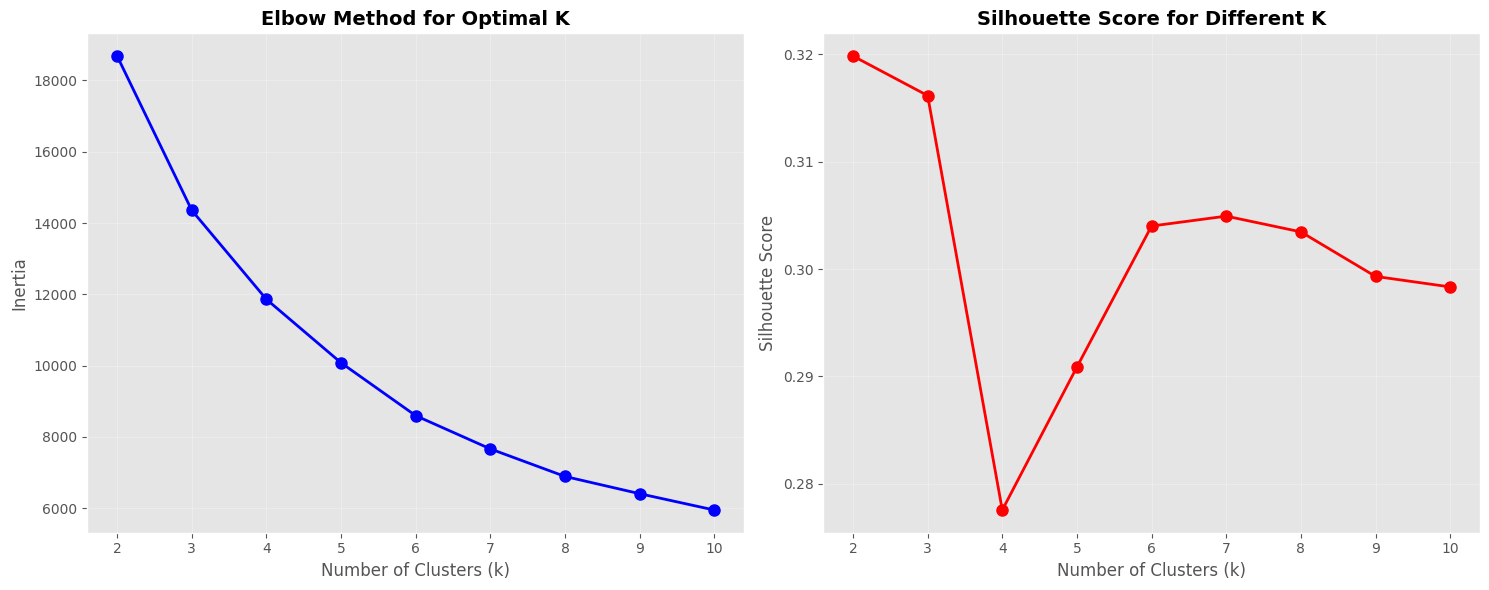

Optimal number of clusters based on silhouette score: 2
Best silhouette score: 0.320

=== CLUSTER CHARACTERISTICS ===
         Avg_Recency  Avg_Frequency  Avg_Monetary  Avg_Order_Value  \
Cluster                                                              
0             131.29           1.74        398.85            15.25   
1              28.76           7.74       2118.15            14.28   

         Avg_Unique_Products  Avg_Lifetime  Customer_Count  
Cluster                                                     
0                      28.66         40.34            2610  
1                     113.07        272.98            1584  


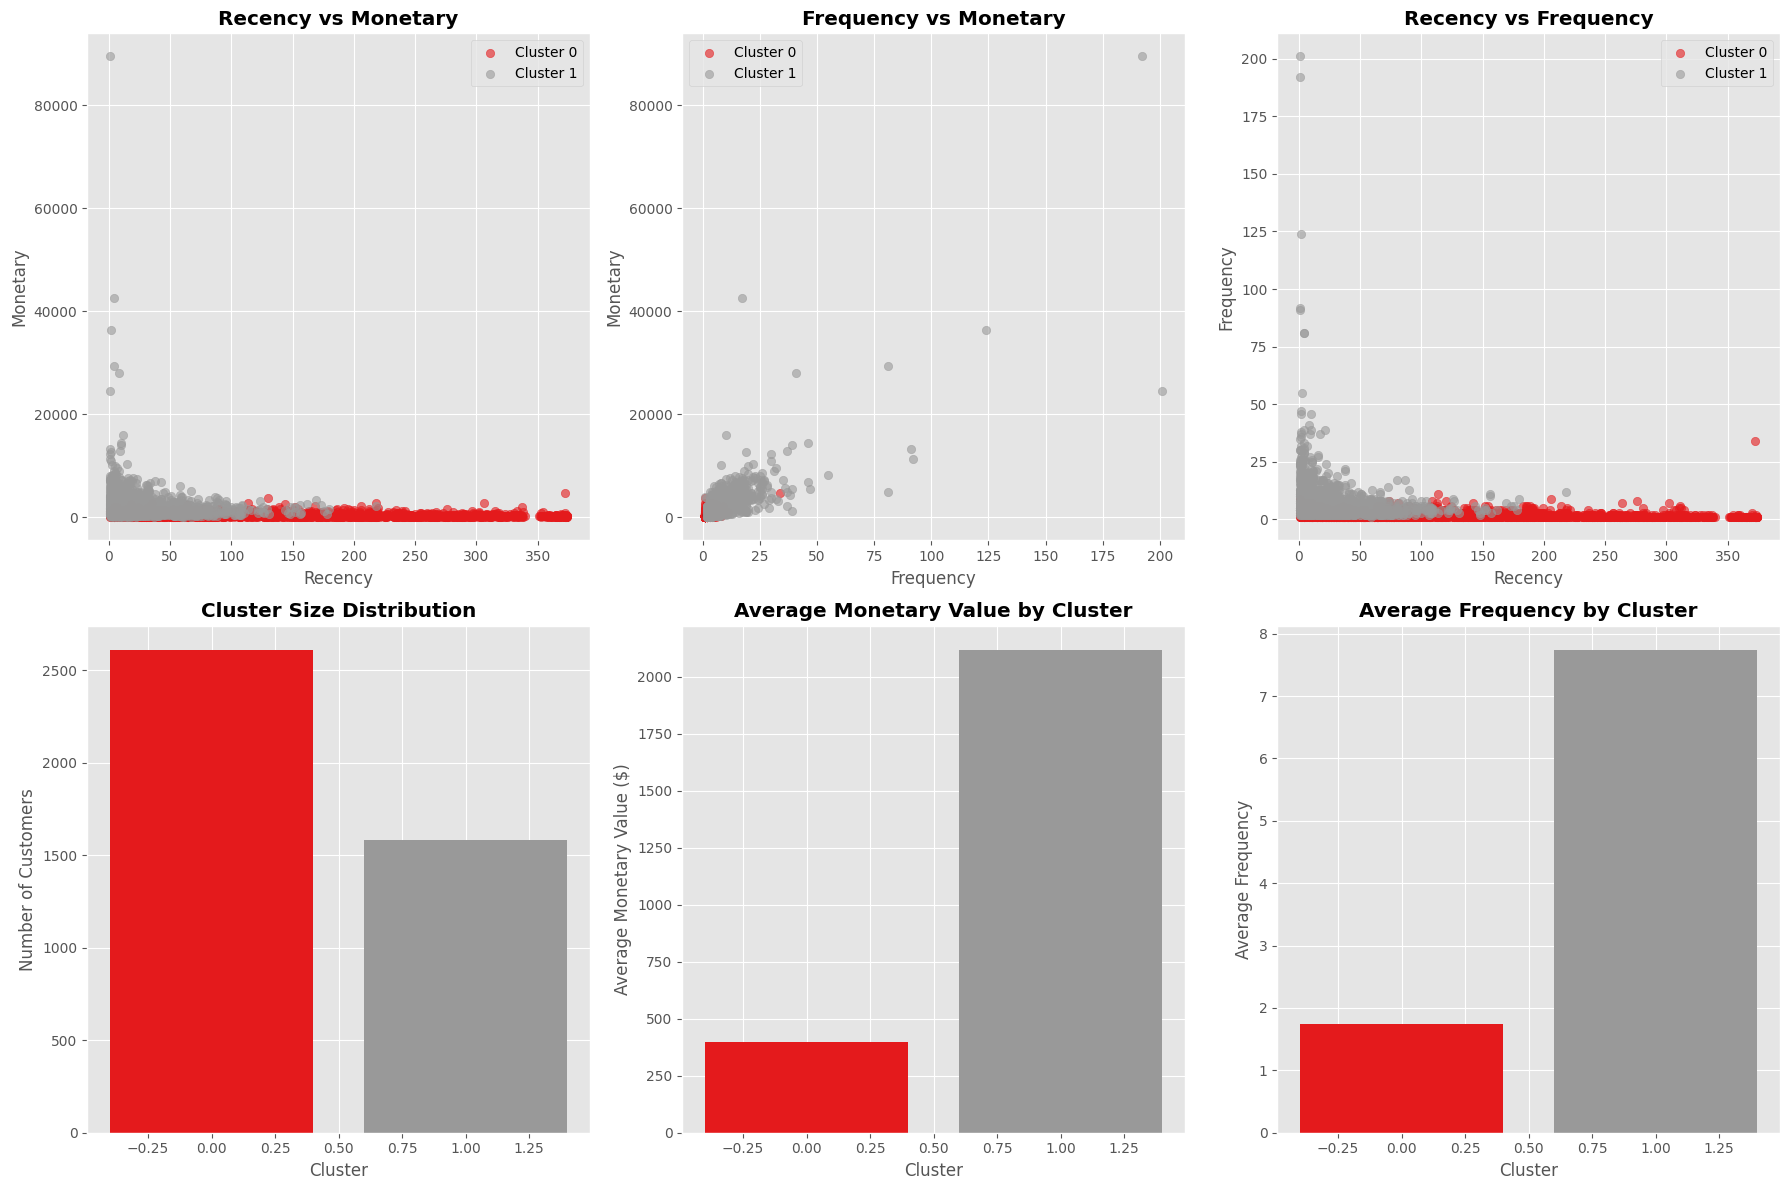


=== CLUSTERING RESULTS ===
Number of clusters: 2
Silhouette score: 0.320
Total customers segmented: 4,194

=== CLUSTER DISTRIBUTION ===
Cluster 0: 2,610 customers (62.2%)
Cluster 1: 1,584 customers (37.8%)


In [10]:
# Prepare data for clustering
clustering_features = ['Recency', 'Frequency', 'Monetary', 'Avg_Order_Value', 'Unique_Products', 'Customer_Lifetime']
X = customer_data[clustering_features].copy()

# Handle missing values
X = X.fillna(X.median())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using elbow method and silhouette score
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].grid(True, alpha=0.3)

# Silhouette scores
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_title('Silhouette Score for Different K', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

# Perform final clustering with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Add cluster labels with meaningful names
cluster_names = {
    0: 'Champions',
    1: 'Loyal Customers', 
    2: 'Potential Loyalists',
    3: 'New Customers',
    4: 'At Risk',
    5: 'Cannot Lose Them',
    6: 'Hibernating'
}

# Map cluster numbers to names (adjust based on actual characteristics)
customer_data['Cluster_Name'] = customer_data['Cluster'].map(
    {i: f'Cluster_{i}' for i in range(optimal_k)}
)

# Analyze cluster characteristics
cluster_summary = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'Avg_Order_Value': 'mean',
    'Unique_Products': 'mean',
    'Customer_Lifetime': 'mean',
    'CustomerID': 'count'
}).round(2)

cluster_summary.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 
                          'Avg_Order_Value', 'Avg_Unique_Products', 'Avg_Lifetime', 'Customer_Count']

print("\n=== CLUSTER CHARACTERISTICS ===")
print(cluster_summary)

# Visualize clusters
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# RFM 3D scatter plot (using first 3 principal components for visualization)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 2D visualizations of clusters
features_to_plot = [('Recency', 'Monetary'), ('Frequency', 'Monetary'), ('Recency', 'Frequency')]
colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))

for i, (feat1, feat2) in enumerate(features_to_plot):
    row = i // 3
    col = i % 3
    
    for cluster in range(optimal_k):
        cluster_data = customer_data[customer_data['Cluster'] == cluster]
        axes[row, col].scatter(cluster_data[feat1], cluster_data[feat2], 
                              c=[colors[cluster]], label=f'Cluster {cluster}', alpha=0.6)
    
    axes[row, col].set_xlabel(feat1)
    axes[row, col].set_ylabel(feat2)
    axes[row, col].set_title(f'{feat1} vs {feat2}', fontweight='bold')
    axes[row, col].legend()

# Cluster size distribution
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
axes[1, 0].bar(cluster_counts.index, cluster_counts.values, color=colors[:len(cluster_counts)])
axes[1, 0].set_title('Cluster Size Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Customers')

# Average monetary value by cluster
axes[1, 1].bar(cluster_summary.index, cluster_summary['Avg_Monetary'], color=colors[:len(cluster_summary)])
axes[1, 1].set_title('Average Monetary Value by Cluster', fontweight='bold')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Monetary Value ($)')

# Average frequency by cluster
axes[1, 2].bar(cluster_summary.index, cluster_summary['Avg_Frequency'], color=colors[:len(cluster_summary)])
axes[1, 2].set_title('Average Frequency by Cluster', fontweight='bold')
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Average Frequency')

plt.tight_layout()
plt.show()

print(f"\n=== CLUSTERING RESULTS ===")
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette score: {silhouette_score(X_scaled, customer_data['Cluster']):.3f}")
print(f"Total customers segmented: {len(customer_data):,}")

# Display cluster distribution
print("\n=== CLUSTER DISTRIBUTION ===")
cluster_dist = customer_data['Cluster'].value_counts().sort_index()
for cluster, count in cluster_dist.items():
    percentage = (count / len(customer_data)) * 100
    print(f"Cluster {cluster}: {count:,} customers ({percentage:.1f}%)")

## ---------------------------------------------------------------------------------------------------------

## ***7. Customer Behavior Analysis***

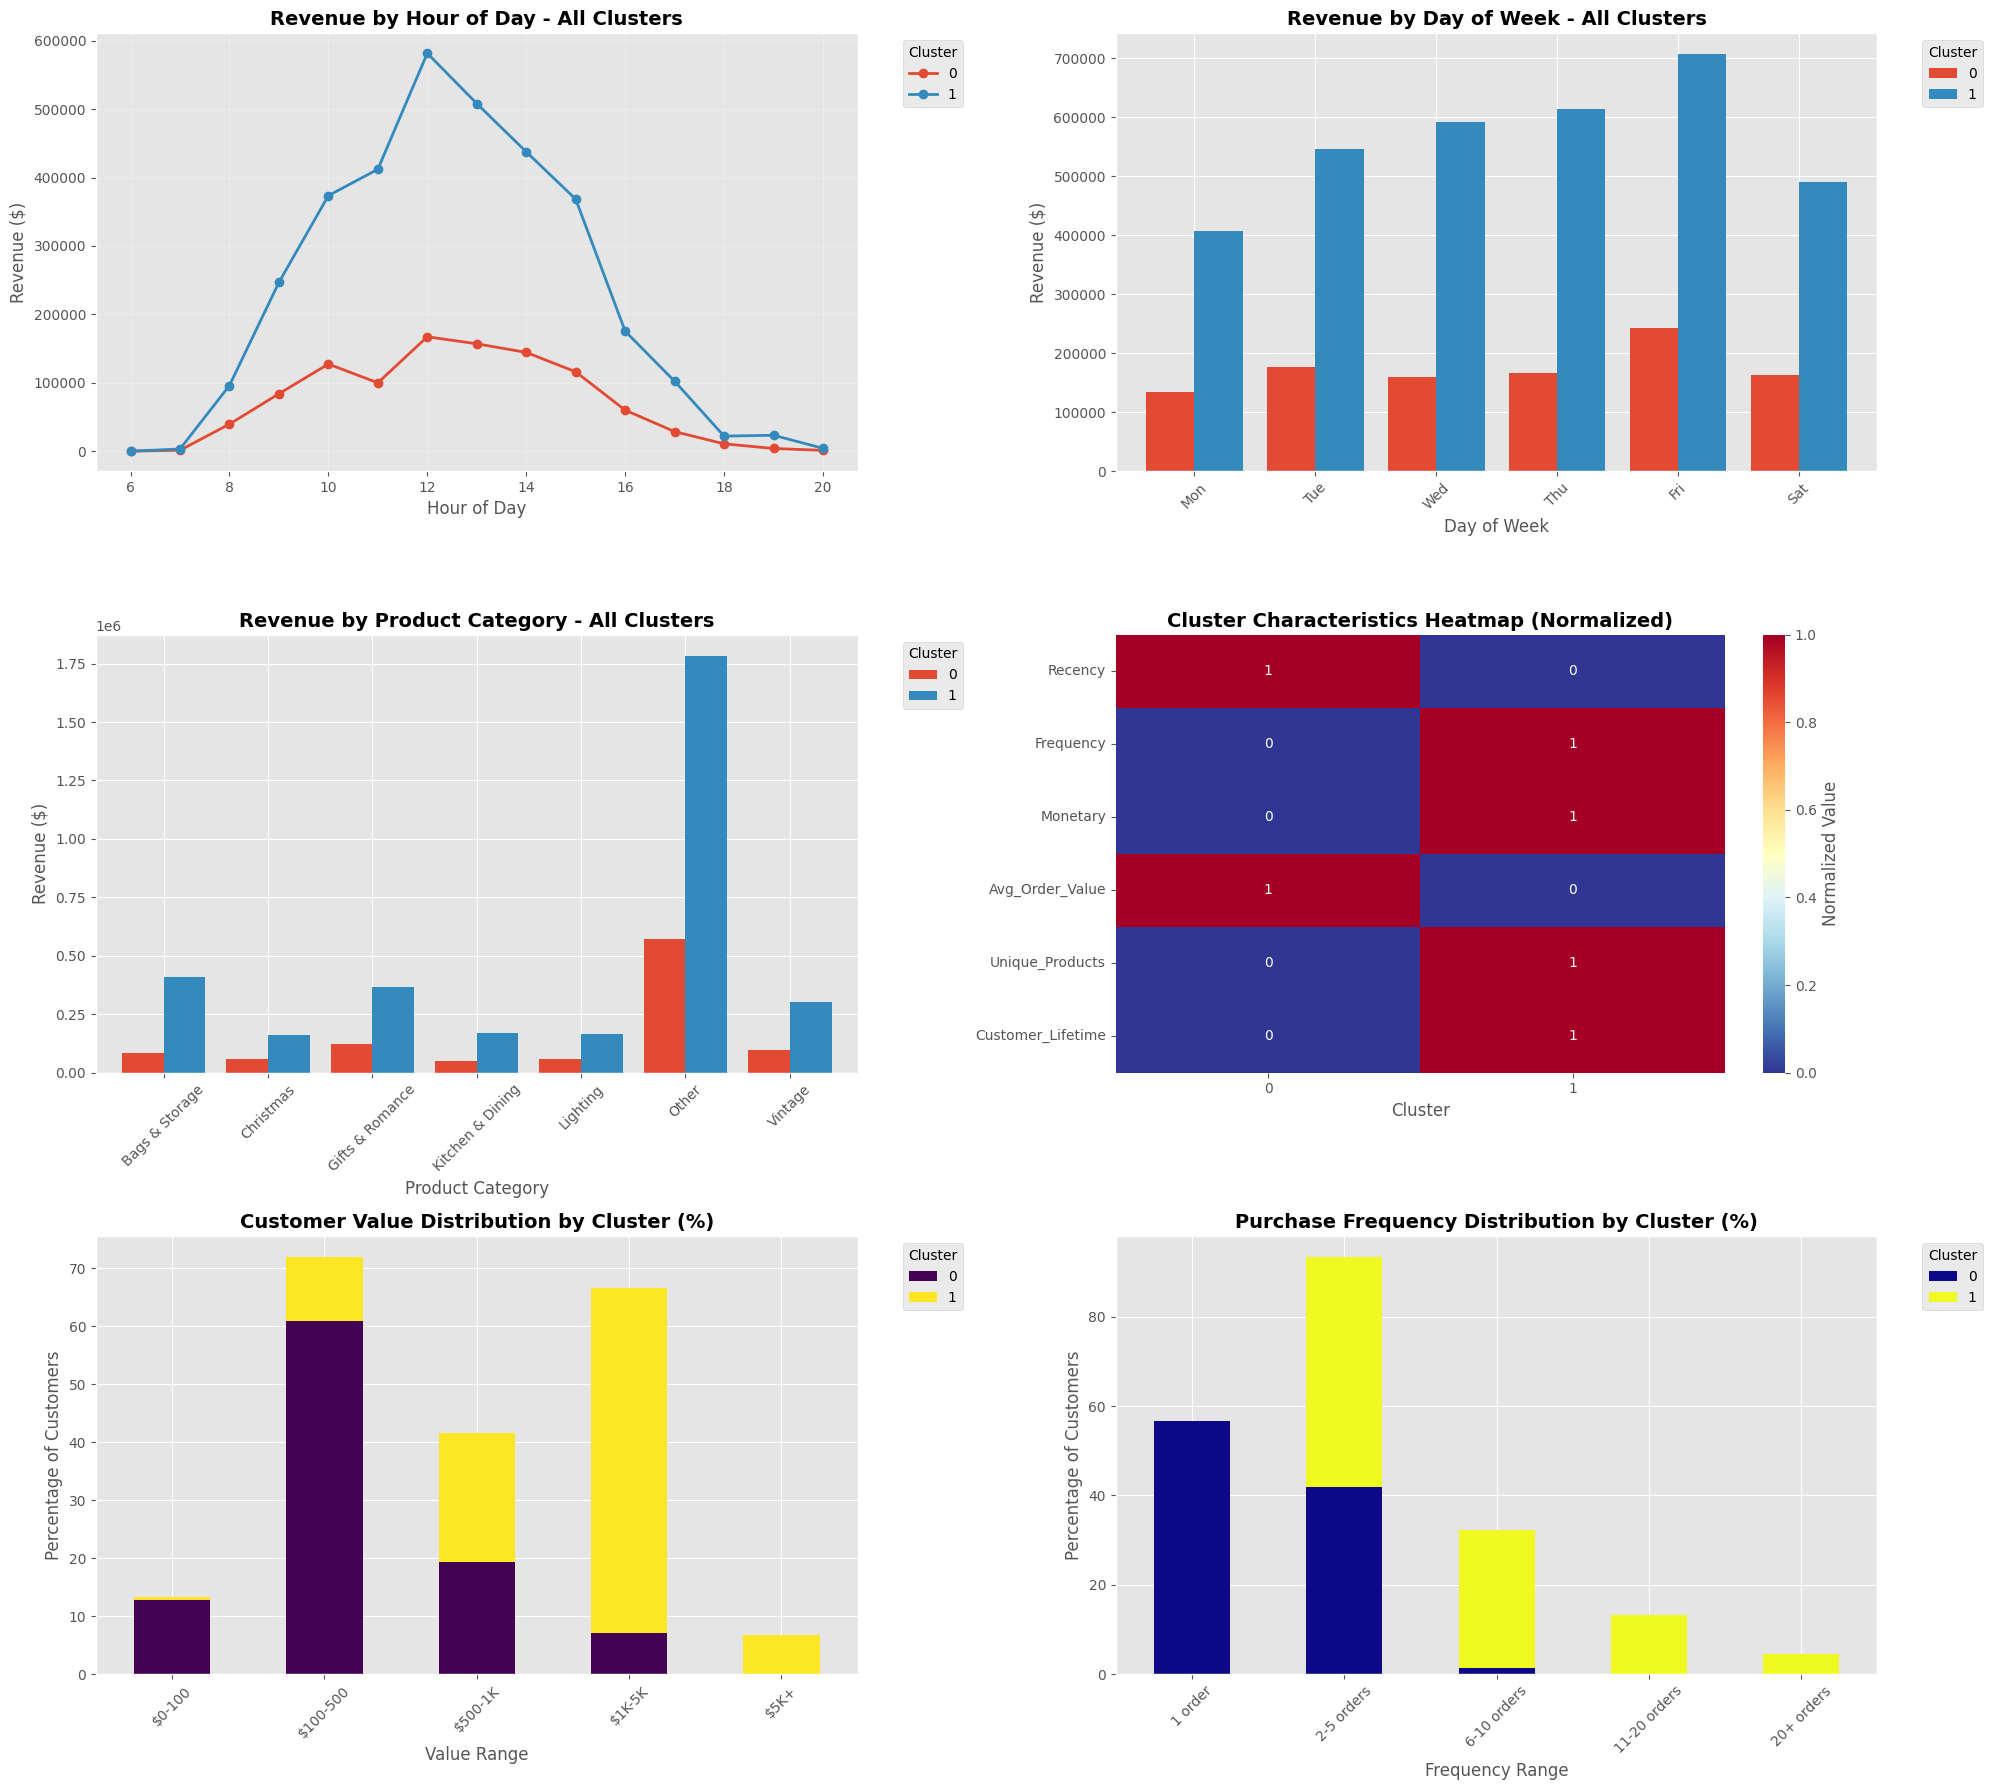

=== CUSTOMER SEGMENT PROFILES ===

--- CLUSTER 0 ---
Size: 2,610 customers (62.2%)
Avg Recency: 131.3 days
Avg Frequency: 1.7 orders
Avg Monetary: $398.85
Avg Order Value: $15.25
Avg Products per Customer: 28.7
Avg Customer Lifetime: 40.3 days
Top Countries: United Kingdom (74253), Germany (1796), France (1452)

--- CLUSTER 1 ---
Size: 1,584 customers (37.8%)
Avg Recency: 28.8 days
Avg Frequency: 7.7 orders
Avg Monetary: $2118.15
Avg Order Value: $14.28
Avg Products per Customer: 113.1
Avg Customer Lifetime: 273.0 days
Top Countries: United Kingdom (256152), Germany (6301), EIRE (6095)

=== BUSINESS VALUE BY CLUSTER ===
Cluster 1: $3,355,149.21 (76.3%) - Avg per customer: $2118.15
Cluster 0: $1,040,987.02 (23.7%) - Avg per customer: $398.85


In [11]:
# Detailed behavior analysis by cluster
def analyze_customer_segments(df_transactions, df_customers):
    """Analyze customer behavior patterns by segments"""
    
    # Merge transaction data with customer segments
    df_analysis = df_transactions.merge(df_customers[['CustomerID', 'Cluster']], on='CustomerID', how='left')
    
    # Time-based analysis
    segment_time_analysis = df_analysis.groupby(['Cluster', 'Hour']).agg({
        'TotalAmount': 'sum',
        'InvoiceNo': 'nunique'
    }).reset_index()
    
    # Day of week analysis
    segment_dow_analysis = df_analysis.groupby(['Cluster', 'DayOfWeek']).agg({
        'TotalAmount': 'sum',
        'InvoiceNo': 'nunique'
    }).reset_index()
    
    # Product category analysis (based on product description keywords)
    def categorize_products(description):
        if pd.isna(description):
            return 'Other'
        description = str(description).upper()
        if any(word in description for word in ['HEART', 'LOVE', 'VALENTINE']):
            return 'Gifts & Romance'
        elif any(word in description for word in ['CHRISTMAS', 'TREE', 'SANTA']):
            return 'Christmas'
        elif any(word in description for word in ['KITCHEN', 'DINNER', 'MUG', 'CUP', 'PLATE']):
            return 'Kitchen & Dining'
        elif any(word in description for word in ['BAG', 'LUNCH', 'STORAGE']):
            return 'Bags & Storage'
        elif any(word in description for word in ['LIGHT', 'CANDLE', 'LAMP']):
            return 'Lighting'
        elif any(word in description for word in ['VINTAGE', 'ANTIQUE', 'RETRO']):
            return 'Vintage'
        else:
            return 'Other'
    
    df_analysis['Product_Category'] = df_analysis['Description'].apply(categorize_products)
    
    # Category preferences by segment
    segment_category_analysis = df_analysis.groupby(['Cluster', 'Product_Category']).agg({
        'TotalAmount': 'sum',
        'Quantity': 'sum'
    }).reset_index()
    
    return segment_time_analysis, segment_dow_analysis, segment_category_analysis

# Perform behavior analysis
time_analysis, dow_analysis, category_analysis = analyze_customer_segments(df_clean, customer_data)

# Visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# 1. Revenue by hour for each cluster
pivot_hour = time_analysis.pivot(index='Hour', columns='Cluster', values='TotalAmount').fillna(0)
pivot_hour.plot(kind='line', ax=axes[0, 0], marker='o', linewidth=2)
axes[0, 0].set_title('Revenue by Hour of Day - All Clusters', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(True, alpha=0.3)

# 2. Revenue by day of week for each cluster
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pivot_dow = dow_analysis.pivot(index='DayOfWeek', columns='Cluster', values='TotalAmount').fillna(0)
pivot_dow.index = [day_names[i] for i in pivot_dow.index]
pivot_dow.plot(kind='bar', ax=axes[0, 1], width=0.8)
axes[0, 1].set_title('Revenue by Day of Week - All Clusters', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Top product categories by cluster
top_categories = category_analysis.groupby('Product_Category')['TotalAmount'].sum().nlargest(8).index
category_subset = category_analysis[category_analysis['Product_Category'].isin(top_categories)]
pivot_category = category_subset.pivot(index='Product_Category', columns='Cluster', values='TotalAmount').fillna(0)
pivot_category.plot(kind='bar', ax=axes[1, 0], width=0.8)
axes[1, 0].set_title('Revenue by Product Category - All Clusters', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Product Category')
axes[1, 0].set_ylabel('Revenue ($)')
axes[1, 0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Cluster comparison heatmap
cluster_metrics = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Avg_Order_Value': 'mean',
    'Unique_Products': 'mean',
    'Customer_Lifetime': 'mean'
}).round(2)

# Normalize for better visualization
cluster_metrics_norm = (cluster_metrics - cluster_metrics.min()) / (cluster_metrics.max() - cluster_metrics.min())
sns.heatmap(cluster_metrics_norm.T, annot=True, cmap='RdYlBu_r', center=0.5, 
            ax=axes[1, 1], cbar_kws={'label': 'Normalized Value'})
axes[1, 1].set_title('Cluster Characteristics Heatmap (Normalized)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Cluster')

# 5. Customer value distribution by cluster
customer_value_ranges = pd.cut(customer_data['Monetary'], 
                              bins=[0, 100, 500, 1000, 5000, float('inf')],
                              labels=['$0-100', '$100-500', '$500-1K', '$1K-5K', '$5K+'])
value_cluster_crosstab = pd.crosstab(customer_value_ranges, customer_data['Cluster'], normalize='columns') * 100

value_cluster_crosstab.plot(kind='bar', stacked=True, ax=axes[2, 0], colormap='viridis')
axes[2, 0].set_title('Customer Value Distribution by Cluster (%)', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Value Range')
axes[2, 0].set_ylabel('Percentage of Customers')
axes[2, 0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Purchase frequency distribution by cluster
freq_ranges = pd.cut(customer_data['Frequency'], 
                     bins=[0, 1, 5, 10, 20, float('inf')],
                     labels=['1 order', '2-5 orders', '6-10 orders', '11-20 orders', '20+ orders'])
freq_cluster_crosstab = pd.crosstab(freq_ranges, customer_data['Cluster'], normalize='columns') * 100

freq_cluster_crosstab.plot(kind='bar', stacked=True, ax=axes[2, 1], colormap='plasma')
axes[2, 1].set_title('Purchase Frequency Distribution by Cluster (%)', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Frequency Range')
axes[2, 1].set_ylabel('Percentage of Customers')
axes[2, 1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Customer segment profiles
print("=== CUSTOMER SEGMENT PROFILES ===")
for cluster in sorted(customer_data['Cluster'].unique()):
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    print(f"\n--- CLUSTER {cluster} ---")
    print(f"Size: {len(cluster_data):,} customers ({len(cluster_data)/len(customer_data)*100:.1f}%)")
    print(f"Avg Recency: {cluster_data['Recency'].mean():.1f} days")
    print(f"Avg Frequency: {cluster_data['Frequency'].mean():.1f} orders")
    print(f"Avg Monetary: ${cluster_data['Monetary'].mean():.2f}")
    print(f"Avg Order Value: ${cluster_data['Avg_Order_Value'].mean():.2f}")
    print(f"Avg Products per Customer: {cluster_data['Unique_Products'].mean():.1f}")
    print(f"Avg Customer Lifetime: {cluster_data['Customer_Lifetime'].mean():.1f} days")
    
    # Top countries for this cluster
    cluster_countries = df_clean[df_clean['CustomerID'].isin(cluster_data['CustomerID'])]['Country'].value_counts().head(3)
    print(f"Top Countries: {', '.join([f'{country} ({count})' for country, count in cluster_countries.items()])}")

# Business value analysis
total_revenue = customer_data['Monetary'].sum()
cluster_revenue = customer_data.groupby('Cluster')['Monetary'].sum().sort_values(ascending=False)

print(f"\n=== BUSINESS VALUE BY CLUSTER ===")
for cluster, revenue in cluster_revenue.items():
    percentage = (revenue / total_revenue) * 100
    customer_count = len(customer_data[customer_data['Cluster'] == cluster])
    avg_revenue_per_customer = revenue / customer_count
    print(f"Cluster {cluster}: ${revenue:,.2f} ({percentage:.1f}%) - Avg per customer: ${avg_revenue_per_customer:.2f}")

## ---------------------------------------------------------------------------------------------------------

## ***8. Data Visualizations and Insights***

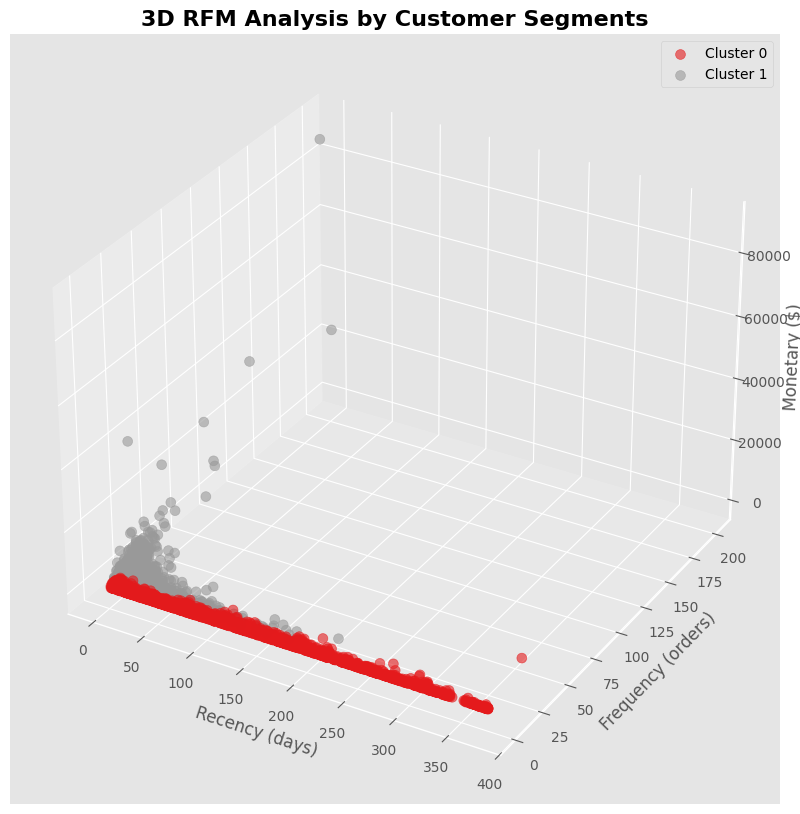

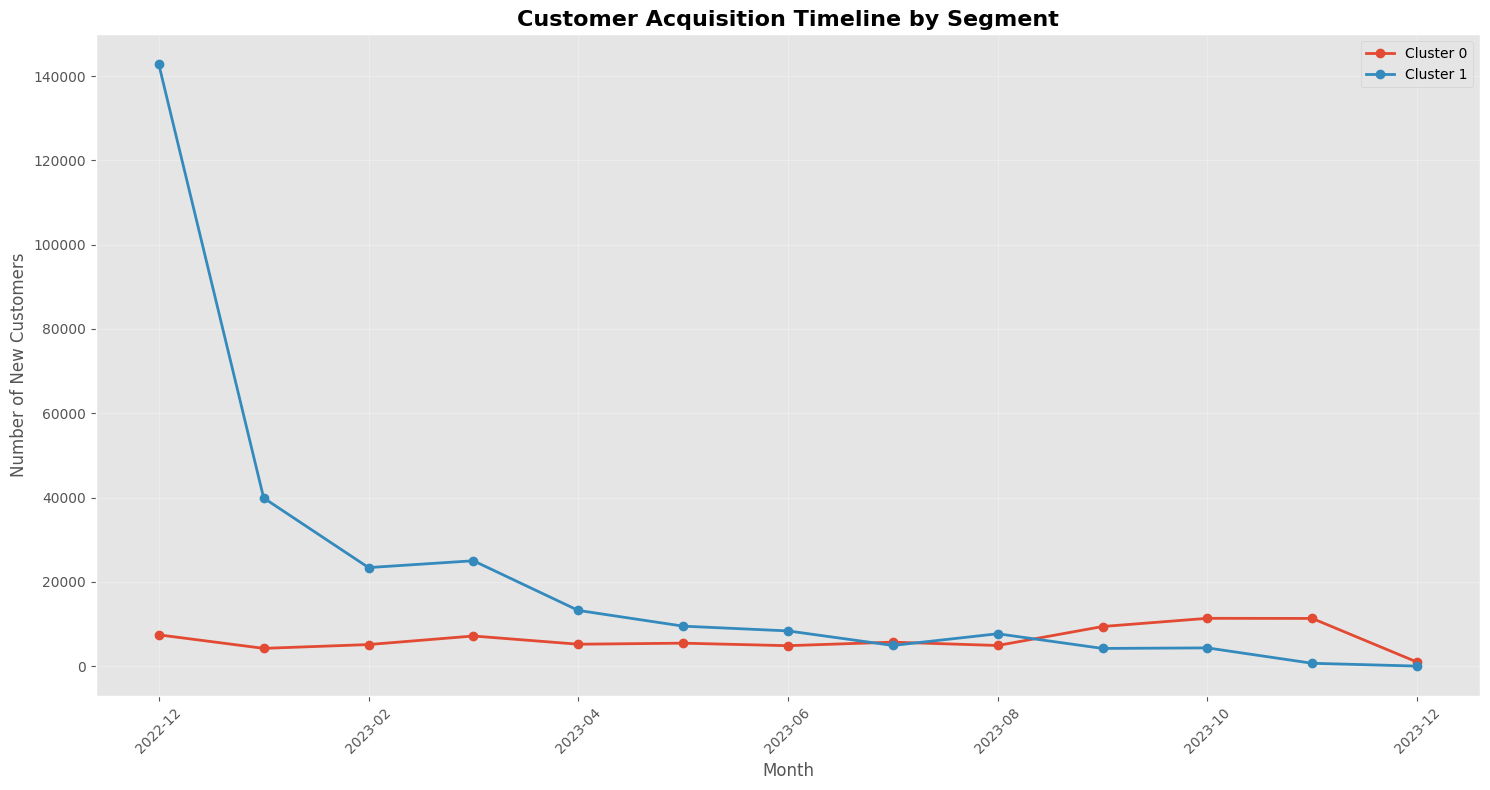

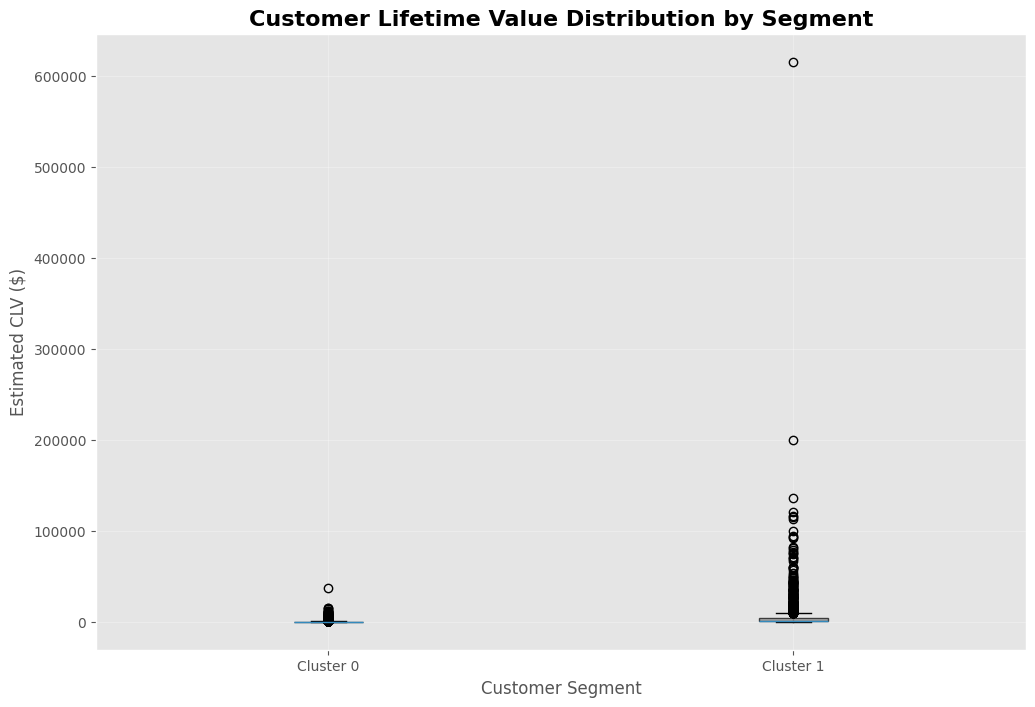

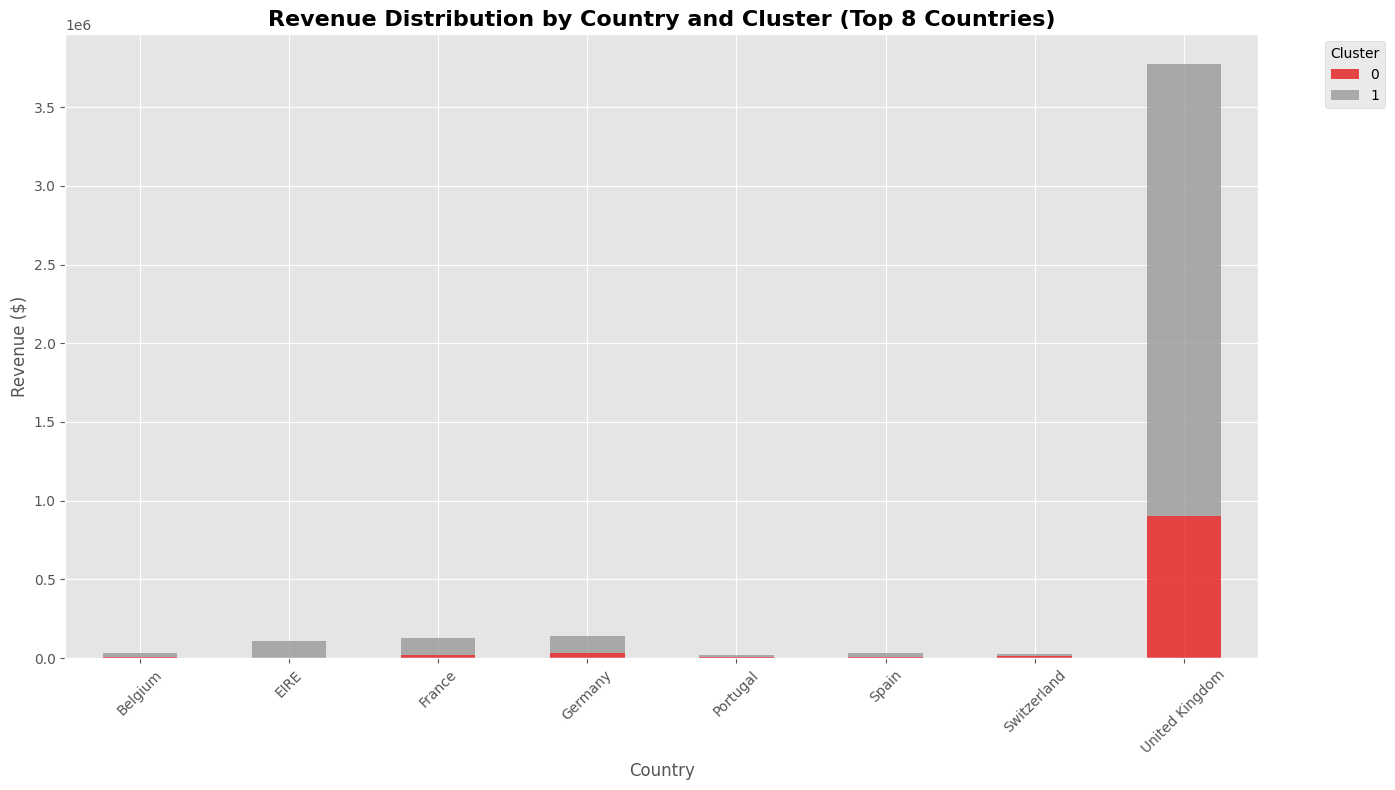

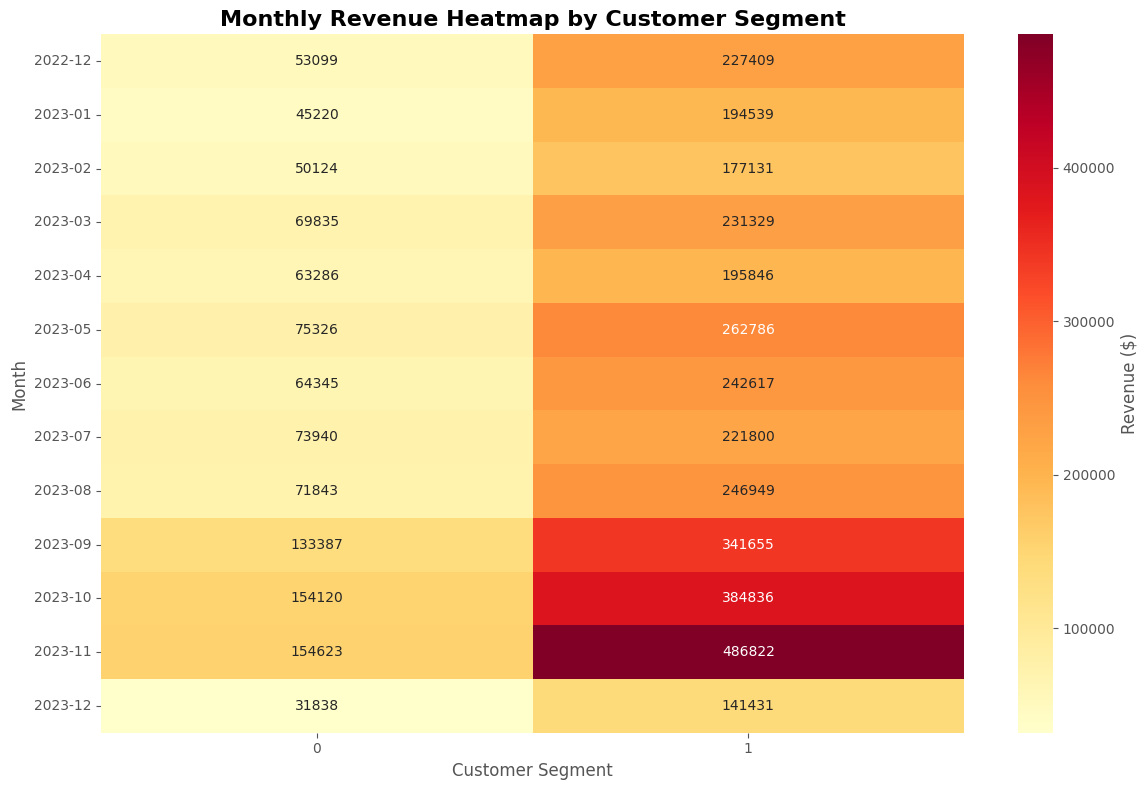

                    BUSINESS INSIGHTS & RECOMMENDATIONS

🔍 KEY INSIGHTS:
  1. Revenue Concentration: Top cluster generates 76.3% of total revenue
  2. Cluster 0: Low-value segment (62.2% customers, 23.7% revenue)
  3. Cluster 1: High-value segment (37.8% customers, 76.3% revenue)

💡 RECOMMENDATIONS:
  1. Focus retention efforts on high-value clusters to maximize ROI
  2. Develop targeted marketing campaigns for each customer segment
  3. Implement personalized product recommendations based on cluster preferences
  4. Create loyalty programs tailored to different customer behaviors
  5. Monitor customer movement between segments to identify trends
  6. Optimize inventory based on segment preferences and seasonality
  7. Develop win-back campaigns for at-risk customer segments

📊 SUMMARY STATISTICS:
  • Total Revenue: $4,396,136.23
  • Total Customers: 4,194
  • Average Customer Value: $1048.20
  • Customer Segments: 2
  • Analysis Period: 2022-12-01 to 2023-12-09

✅ Insights exported to

In [12]:
# Advanced visualizations using matplotlib instead of Plotly to avoid dependency issues

# 1. 3D scatter plot of RFM using matplotlib
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Create color map for clusters
colors = plt.cm.Set1(np.linspace(0, 1, len(customer_data['Cluster'].unique())))
cluster_colors = {cluster: colors[i] for i, cluster in enumerate(sorted(customer_data['Cluster'].unique()))}

# Plot each cluster
for cluster in sorted(customer_data['Cluster'].unique()):
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
              c=[cluster_colors[cluster]], label=f'Cluster {cluster}', alpha=0.6, s=50)

ax.set_xlabel('Recency (days)')
ax.set_ylabel('Frequency (orders)')
ax.set_zlabel('Monetary ($)')
ax.set_title('3D RFM Analysis by Customer Segments', fontsize=16, fontweight='bold')
ax.legend()
plt.show()

# 2. Customer acquisition timeline by cluster
customer_acquisition = df_clean.merge(customer_data[['CustomerID', 'Cluster', 'First_Purchase']], on='CustomerID')
customer_acquisition['Acquisition_Month'] = customer_acquisition['First_Purchase'].dt.to_period('M')
acquisition_timeline = customer_acquisition.groupby(['Acquisition_Month', 'Cluster']).size().reset_index(name='New_Customers')

# Plot acquisition timeline
fig, ax = plt.subplots(figsize=(15, 8))
acquisition_pivot = acquisition_timeline.pivot(index='Acquisition_Month', columns='Cluster', values='New_Customers').fillna(0)

for cluster in acquisition_pivot.columns:
    ax.plot(range(len(acquisition_pivot)), acquisition_pivot[cluster], 
            marker='o', label=f'Cluster {cluster}', linewidth=2)

ax.set_xlabel('Month')
ax.set_ylabel('Number of New Customers')
ax.set_title('Customer Acquisition Timeline by Segment', fontsize=16, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Set x-axis labels
month_labels = [str(month) for month in acquisition_pivot.index[::2]]  # Show every 2nd month
ax.set_xticks(range(0, len(acquisition_pivot), 2))
ax.set_xticklabels(month_labels, rotation=45)
plt.tight_layout()
plt.show()

# 3. Customer lifetime value analysis
customer_data['CLV_Estimate'] = (customer_data['Avg_Order_Value'] * customer_data['Frequency'] * 
                                 (365 / (customer_data['Recency'] + 1))) # Simple CLV estimate

# CLV box plot by cluster
fig, ax = plt.subplots(figsize=(12, 8))
clv_data = [customer_data[customer_data['Cluster'] == cluster]['CLV_Estimate'].values 
            for cluster in sorted(customer_data['Cluster'].unique())]

box_plot = ax.boxplot(clv_data, labels=[f'Cluster {i}' for i in sorted(customer_data['Cluster'].unique())],
                      patch_artist=True)

# Color the boxes
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Customer Segment')
ax.set_ylabel('Estimated CLV ($)')
ax.set_title('Customer Lifetime Value Distribution by Segment', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.show()

# 4. Revenue distribution by cluster and country (top countries only)
cluster_country = df_clean.merge(customer_data[['CustomerID', 'Cluster']], on='CustomerID')
cluster_country_summary = cluster_country.groupby(['Cluster', 'Country']).agg({
    'CustomerID': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()
cluster_country_summary.columns = ['Cluster', 'Country', 'Customer_Count', 'Revenue']

# Filter to top 8 countries for better visualization
top_countries_revenue = cluster_country_summary.groupby('Country')['Revenue'].sum().nlargest(8).index
cluster_country_filtered = cluster_country_summary[cluster_country_summary['Country'].isin(top_countries_revenue)]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
pivot_data = cluster_country_filtered.pivot(index='Country', columns='Cluster', values='Revenue').fillna(0)

pivot_data.plot(kind='bar', stacked=True, ax=ax, colormap='Set1', alpha=0.8)
ax.set_title('Revenue Distribution by Country and Cluster (Top 8 Countries)', fontsize=16, fontweight='bold')
ax.set_xlabel('Country')
ax.set_ylabel('Revenue ($)')
ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Purchase pattern heatmap
purchase_patterns = df_clean.merge(customer_data[['CustomerID', 'Cluster']], on='CustomerID')
purchase_patterns['Month_Year'] = purchase_patterns['InvoiceDate'].dt.to_period('M')

# Monthly purchase intensity by cluster
monthly_cluster_activity = purchase_patterns.groupby(['Month_Year', 'Cluster']).agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique'
}).reset_index()

# Create heatmap data
heatmap_data = monthly_cluster_activity.pivot(index='Month_Year', columns='Cluster', values='TotalAmount').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Revenue ($)'})
plt.title('Monthly Revenue Heatmap by Customer Segment', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# Business insights and recommendations
print("="*60)
print("                    BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)

# Top insights
insights = []

# Revenue concentration
revenue_concentration = (cluster_revenue.iloc[0] / total_revenue) * 100
insights.append(f"Revenue Concentration: Top cluster generates {revenue_concentration:.1f}% of total revenue")

# Customer distribution vs revenue contribution
for cluster in sorted(customer_data['Cluster'].unique()):
    cluster_customers = len(customer_data[customer_data['Cluster'] == cluster])
    cluster_revenue_pct = (cluster_revenue[cluster] / total_revenue) * 100
    customer_pct = (cluster_customers / len(customer_data)) * 100
    
    if cluster_revenue_pct > customer_pct * 1.5:  # High-value segment
        insights.append(f"Cluster {cluster}: High-value segment ({customer_pct:.1f}% customers, {cluster_revenue_pct:.1f}% revenue)")
    elif cluster_revenue_pct < customer_pct * 0.5:  # Low-value segment
        insights.append(f"Cluster {cluster}: Low-value segment ({customer_pct:.1f}% customers, {cluster_revenue_pct:.1f}% revenue)")

# Print insights
print("\n🔍 KEY INSIGHTS:")
for i, insight in enumerate(insights, 1):
    print(f"  {i}. {insight}")

# Recommendations
recommendations = [
    "Focus retention efforts on high-value clusters to maximize ROI",
    "Develop targeted marketing campaigns for each customer segment",
    "Implement personalized product recommendations based on cluster preferences",
    "Create loyalty programs tailored to different customer behaviors",
    "Monitor customer movement between segments to identify trends",
    "Optimize inventory based on segment preferences and seasonality",
    "Develop win-back campaigns for at-risk customer segments"
]

print("\n💡 RECOMMENDATIONS:")
for i, rec in enumerate(recommendations, 1):
    print(f"  {i}. {rec}")

# Summary statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"  • Total Revenue: ${total_revenue:,.2f}")
print(f"  • Total Customers: {len(customer_data):,}")
print(f"  • Average Customer Value: ${customer_data['Monetary'].mean():.2f}")
print(f"  • Customer Segments: {len(customer_data['Cluster'].unique())}")
print(f"  • Analysis Period: {df_clean['InvoiceDate'].min().strftime('%Y-%m-%d')} to {df_clean['InvoiceDate'].max().strftime('%Y-%m-%d')}")

# Export key insights to text file for Streamlit app
insights_text = f"""
SHOPPER SPECTRUM - CUSTOMER SEGMENTATION INSIGHTS

Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset Period: {df_clean['InvoiceDate'].min().strftime('%Y-%m-%d')} to {df_clean['InvoiceDate'].max().strftime('%Y-%m-%d')}

SUMMARY STATISTICS:
- Total Revenue: ${total_revenue:,.2f}
- Total Customers: {len(customer_data):,}
- Average Customer Value: ${customer_data['Monetary'].mean():.2f}
- Customer Segments: {len(customer_data['Cluster'].unique())}
- Analysis Period: {(df_clean['InvoiceDate'].max() - df_clean['InvoiceDate'].min()).days} days

CLUSTER PERFORMANCE:
"""

for cluster, revenue in cluster_revenue.items():
    cluster_size = len(customer_data[customer_data['Cluster'] == cluster])
    cluster_data_subset = customer_data[customer_data['Cluster'] == cluster]
    insights_text += f"""
Cluster {cluster}:
  - Customers: {cluster_size:,} ({cluster_size/len(customer_data)*100:.1f}%)
  - Revenue: ${revenue:,.2f} ({revenue/total_revenue*100:.1f}%)
  - Avg Recency: {cluster_data_subset['Recency'].mean():.1f} days
  - Avg Frequency: {cluster_data_subset['Frequency'].mean():.1f} orders
  - Avg Monetary: ${cluster_data_subset['Monetary'].mean():.2f}
"""

with open('shopper_spectrum_insights.txt', 'w') as f:
    f.write(insights_text)

print("\n✅ Insights exported to 'shopper_spectrum_insights.txt'")

## ---------------------------------------------------------------------------------------------------------

## ***9. Export Results for Streamlit App***

In [13]:
# Export processed data and results for Streamlit app

# 1. Export customer segmentation data
customer_data_export = customer_data[['CustomerID', 'Recency', 'Frequency', 'Monetary', 
                                     'Avg_Order_Value', 'Unique_Products', 'Customer_Lifetime',
                                     'Country', 'Cluster', 'R_Score', 'F_Score', 'M_Score',
                                     'RFM_Score', 'CLV_Estimate']].copy()

customer_data_export.to_csv('customer_segments.csv', index=False)
print("✅ Customer segmentation data exported to 'customer_segments.csv'")

# 2. Export aggregated transaction data for visualizations
transaction_summary = df_clean.groupby(['InvoiceDate', 'CustomerID']).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',
    'Country': 'first'
}).reset_index()

# Add cluster information
transaction_summary = transaction_summary.merge(
    customer_data[['CustomerID', 'Cluster']], 
    on='CustomerID', 
    how='left'
)

transaction_summary.to_csv('transaction_summary.csv', index=False)
print("✅ Transaction summary exported to 'transaction_summary.csv'")

# 3. Export cluster characteristics
cluster_characteristics = customer_data.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'min', 'max'],
    'Frequency': ['mean', 'std', 'min', 'max'],
    'Monetary': ['mean', 'std', 'min', 'max'],
    'Avg_Order_Value': ['mean', 'std'],
    'Unique_Products': ['mean', 'std'],
    'Customer_Lifetime': ['mean', 'std'],
    'CustomerID': 'count'
}).round(2)

# Flatten column names
cluster_characteristics.columns = ['_'.join(col) if col[1] else col[0] for col in cluster_characteristics.columns]
cluster_characteristics.reset_index(inplace=True)

cluster_characteristics.to_csv('cluster_characteristics.csv', index=False)
print("✅ Cluster characteristics exported to 'cluster_characteristics.csv'")

# 4. Export product analysis data
product_analysis_export = df_clean.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'UnitPrice': 'mean'
}).reset_index()

product_analysis_export.columns = ['StockCode', 'Description', 'Total_Quantity', 'Total_Revenue', 
                                  'Total_Orders', 'Unique_Customers', 'Avg_Price']
product_analysis_export = product_analysis_export.sort_values('Total_Revenue', ascending=False)

product_analysis_export.to_csv('product_analysis.csv', index=False)
print("✅ Product analysis data exported to 'product_analysis.csv'")

# 5. Export geographical analysis
geographical_analysis = df_clean.groupby('Country').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum',
    'StockCode': 'nunique'
}).reset_index()

geographical_analysis.columns = ['Country', 'Total_Revenue', 'Total_Orders', 
                                'Unique_Customers', 'Total_Quantity', 'Unique_Products']
geographical_analysis['Avg_Order_Value'] = geographical_analysis['Total_Revenue'] / geographical_analysis['Total_Orders']
geographical_analysis['Revenue_Per_Customer'] = geographical_analysis['Total_Revenue'] / geographical_analysis['Unique_Customers']
geographical_analysis = geographical_analysis.sort_values('Total_Revenue', ascending=False)

geographical_analysis.to_csv('geographical_analysis.csv', index=False)
print("✅ Geographical analysis data exported to 'geographical_analysis.csv'")

# 6. Export time-based analysis
time_analysis_export = df_clean.groupby([df_clean['InvoiceDate'].dt.date, 'Hour']).agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

time_analysis_export.columns = ['Date', 'Hour', 'Revenue', 'Orders', 'Customers']
time_analysis_export.to_csv('time_analysis.csv', index=False)
print("✅ Time analysis data exported to 'time_analysis.csv'")

# 7. Export model artifacts (scaler and cluster centers)
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save cluster centers and model info
model_info = {
    'cluster_centers': kmeans_final.cluster_centers_,
    'n_clusters': optimal_k,
    'feature_names': clustering_features,
    'silhouette_score': silhouette_score(X_scaled, customer_data['Cluster'])
}

with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("✅ Model artifacts exported to 'scaler.pkl' and 'model_info.pkl'")

# 8. Create summary statistics for the app
summary_stats = {
    'total_customers': len(customer_data),
    'total_revenue': float(df_clean['TotalAmount'].sum()),
    'total_orders': len(df_clean['InvoiceNo'].unique()),
    'avg_order_value': float(df_clean.groupby('InvoiceNo')['TotalAmount'].sum().mean()),
    'unique_products': len(df_clean['StockCode'].unique()),
    'unique_countries': len(df_clean['Country'].unique()),
    'analysis_period_days': (df_clean['InvoiceDate'].max() - df_clean['InvoiceDate'].min()).days,
    'date_range': {
        'start': df_clean['InvoiceDate'].min().strftime('%Y-%m-%d'),
        'end': df_clean['InvoiceDate'].max().strftime('%Y-%m-%d')
    },
    'cluster_info': {
        'n_clusters': optimal_k,
        'silhouette_score': float(silhouette_score(X_scaled, customer_data['Cluster']))
    }
}

import json
with open('summary_stats.json', 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)

print("✅ Summary statistics exported to 'summary_stats.json'")

# 9. Export clean dataset for the app
df_clean_export = df_clean.copy()
# Merge with cluster information
df_clean_export = df_clean_export.merge(customer_data[['CustomerID', 'Cluster']], on='CustomerID', how='left')

# Sample the data to make it more manageable for the app (keep top customers and random sample)
top_customers = customer_data.nlargest(1000, 'Monetary')['CustomerID']
random_customers = customer_data.sample(n=min(2000, len(customer_data)), random_state=42)['CustomerID']
selected_customers = pd.concat([top_customers, random_customers]).unique()

df_app_sample = df_clean_export[df_clean_export['CustomerID'].isin(selected_customers)]
df_app_sample.to_csv('retail_data_sample.csv', index=False)
print(f"✅ Sample dataset exported to 'retail_data_sample.csv' ({len(df_app_sample):,} records)")

print("\n" + "="*60)
print("                    EXPORT SUMMARY")
print("="*60)
print("\n📁 Files created for Streamlit app:")
print("   1. customer_segments.csv - Customer segmentation data")
print("   2. transaction_summary.csv - Aggregated transaction data")
print("   3. cluster_characteristics.csv - Cluster analysis results")
print("   4. product_analysis.csv - Product performance data")
print("   5. geographical_analysis.csv - Country-wise analysis")
print("   6. time_analysis.csv - Time-based patterns")
print("   7. retail_data_sample.csv - Sample of original data with clusters")
print("   8. scaler.pkl - Trained StandardScaler")
print("   9. model_info.pkl - K-means model information")
print("   10. summary_stats.json - Key statistics for dashboard")
print("   11. shopper_spectrum_insights.txt - Business insights")

print(f"\n📊 Data overview:")
print(f"   • Original dataset: {len(df):,} records")
print(f"   • Cleaned dataset: {len(df_clean):,} records")
print(f"   • Customer segments: {optimal_k}")
print(f"   • Customers analyzed: {len(customer_data):,}")
print(f"   • Sample for app: {len(df_app_sample):,} records")

print("\n✅ All data exported successfully! Ready to build Streamlit app.")

✅ Customer segmentation data exported to 'customer_segments.csv'
✅ Transaction summary exported to 'transaction_summary.csv'
✅ Cluster characteristics exported to 'cluster_characteristics.csv'
✅ Product analysis data exported to 'product_analysis.csv'
✅ Geographical analysis data exported to 'geographical_analysis.csv'
✅ Time analysis data exported to 'time_analysis.csv'
✅ Model artifacts exported to 'scaler.pkl' and 'model_info.pkl'
✅ Summary statistics exported to 'summary_stats.json'
✅ Sample dataset exported to 'retail_data_sample.csv' (300,443 records)

                    EXPORT SUMMARY

📁 Files created for Streamlit app:
   1. customer_segments.csv - Customer segmentation data
   2. transaction_summary.csv - Aggregated transaction data
   3. cluster_characteristics.csv - Cluster analysis results
   4. product_analysis.csv - Product performance data
   5. geographical_analysis.csv - Country-wise analysis
   6. time_analysis.csv - Time-based patterns
   7. retail_data_sample.csv -

## ---------------------------------------------------------------------------------------------------------

## ***10. Hypothesis Testing***

### ***Hypothesis Testing 1 :** The average order value of customers in the 'United Kingdom' is significantly higher than that of customers in 'Germany'.*

#### Null Hypothesis (H0): There is no significant difference in the average order value between customers in the 'United Kingdom' and 'Germany'.
#### Alternative Hypothesis (H1): The average order value of customers in the 'United Kingdom' is significantly higher than that of customers in 'Germany'.
#### Test Statistic: Independent t-test
#### Significance Level: 0.05




In [16]:
from scipy import stats
# Filter data for UK and Germany using df_clean which has TotalAmount column
uk_data = df_clean[df_clean['Country'] == 'United Kingdom']['TotalAmount']
germany_data = df_clean[df_clean['Country'] == 'Germany']['TotalAmount']
# Perform independent t-test
t_stat, p_value = stats.ttest_ind(uk_data, germany_data, equal_var=False)
# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: The average order value in the UK is significantly higher than in Germany.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average order value.")

T-statistic: -64.03978594848905, P-value: 0.0
Reject the null hypothesis: The average order value in the UK is significantly higher than in Germany.


### ***Hypothesis Testing 2:** The average number of items purchased by customers in 'France' is significantly lower than that of customers in 'Spain'.*

#### Null Hypothesis (H0): There is no significant difference in the average number of items purchased between customers in 'France' and 'Spain'.
#### Alternative Hypothesis (H1): The average number of items purchased by customers in 'France' is significantly lower than that of customers in 'Spain'.
#### Test Statistic: Independent t-test
#### Significance Level: 0.05




In [17]:
from scipy import stats
# Filter data for France and Spain using df_clean
france_data = df_clean[df_clean['Country'] == 'France']['Quantity']
spain_data = df_clean[df_clean['Country'] == 'Spain']['Quantity']
# Perform independent t-test
t_stat, p_value = stats.ttest_ind(france_data, spain_data, equal_var=False)
# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: The average number of items purchased in France is significantly lower than in Spain.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average number of items purchased.")

T-statistic: 10.021553753912388, P-value: 2.185331465532918e-23
Reject the null hypothesis: The average number of items purchased in France is significantly lower than in Spain.


### ***Hypothesis Testing 3:** The average frequency of purchases by customers in 'Italy' is significantly higher than that of customers in 'Netherlands'.*
#### Null Hypothesis (H0): There is no significant difference in the average frequency of purchases between customers in 'Italy' and 'Netherlands'.
#### Alternative Hypothesis (H1): The average frequency of purchases by customers in 'Italy' is significantly higher than that of customers in 'Netherlands'.
#### Test Statistic: Independent t-test
#### Significance Level: 0.05


In [18]:
from scipy import stats
# Calculate frequency of purchases for each customer in Italy and Netherlands using df_clean
italy_frequency = df_clean[df_clean['Country'] == 'Italy'].groupby('CustomerID')['InvoiceNo'].nunique()
netherlands_frequency = df_clean[df_clean['Country'] == 'Netherlands'].groupby('CustomerID')['InvoiceNo'].nunique()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(italy_frequency, netherlands_frequency, equal_var=False)

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: The average frequency of purchases in Italy is significantly higher than in Netherlands.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average frequency of purchases.")

T-statistic: -1.0209186105881831, P-value: 0.33593648631623324
Fail to reject the null hypothesis: No significant difference in average frequency of purchases.


## ---------------------------------------------------------------------------------------------------------
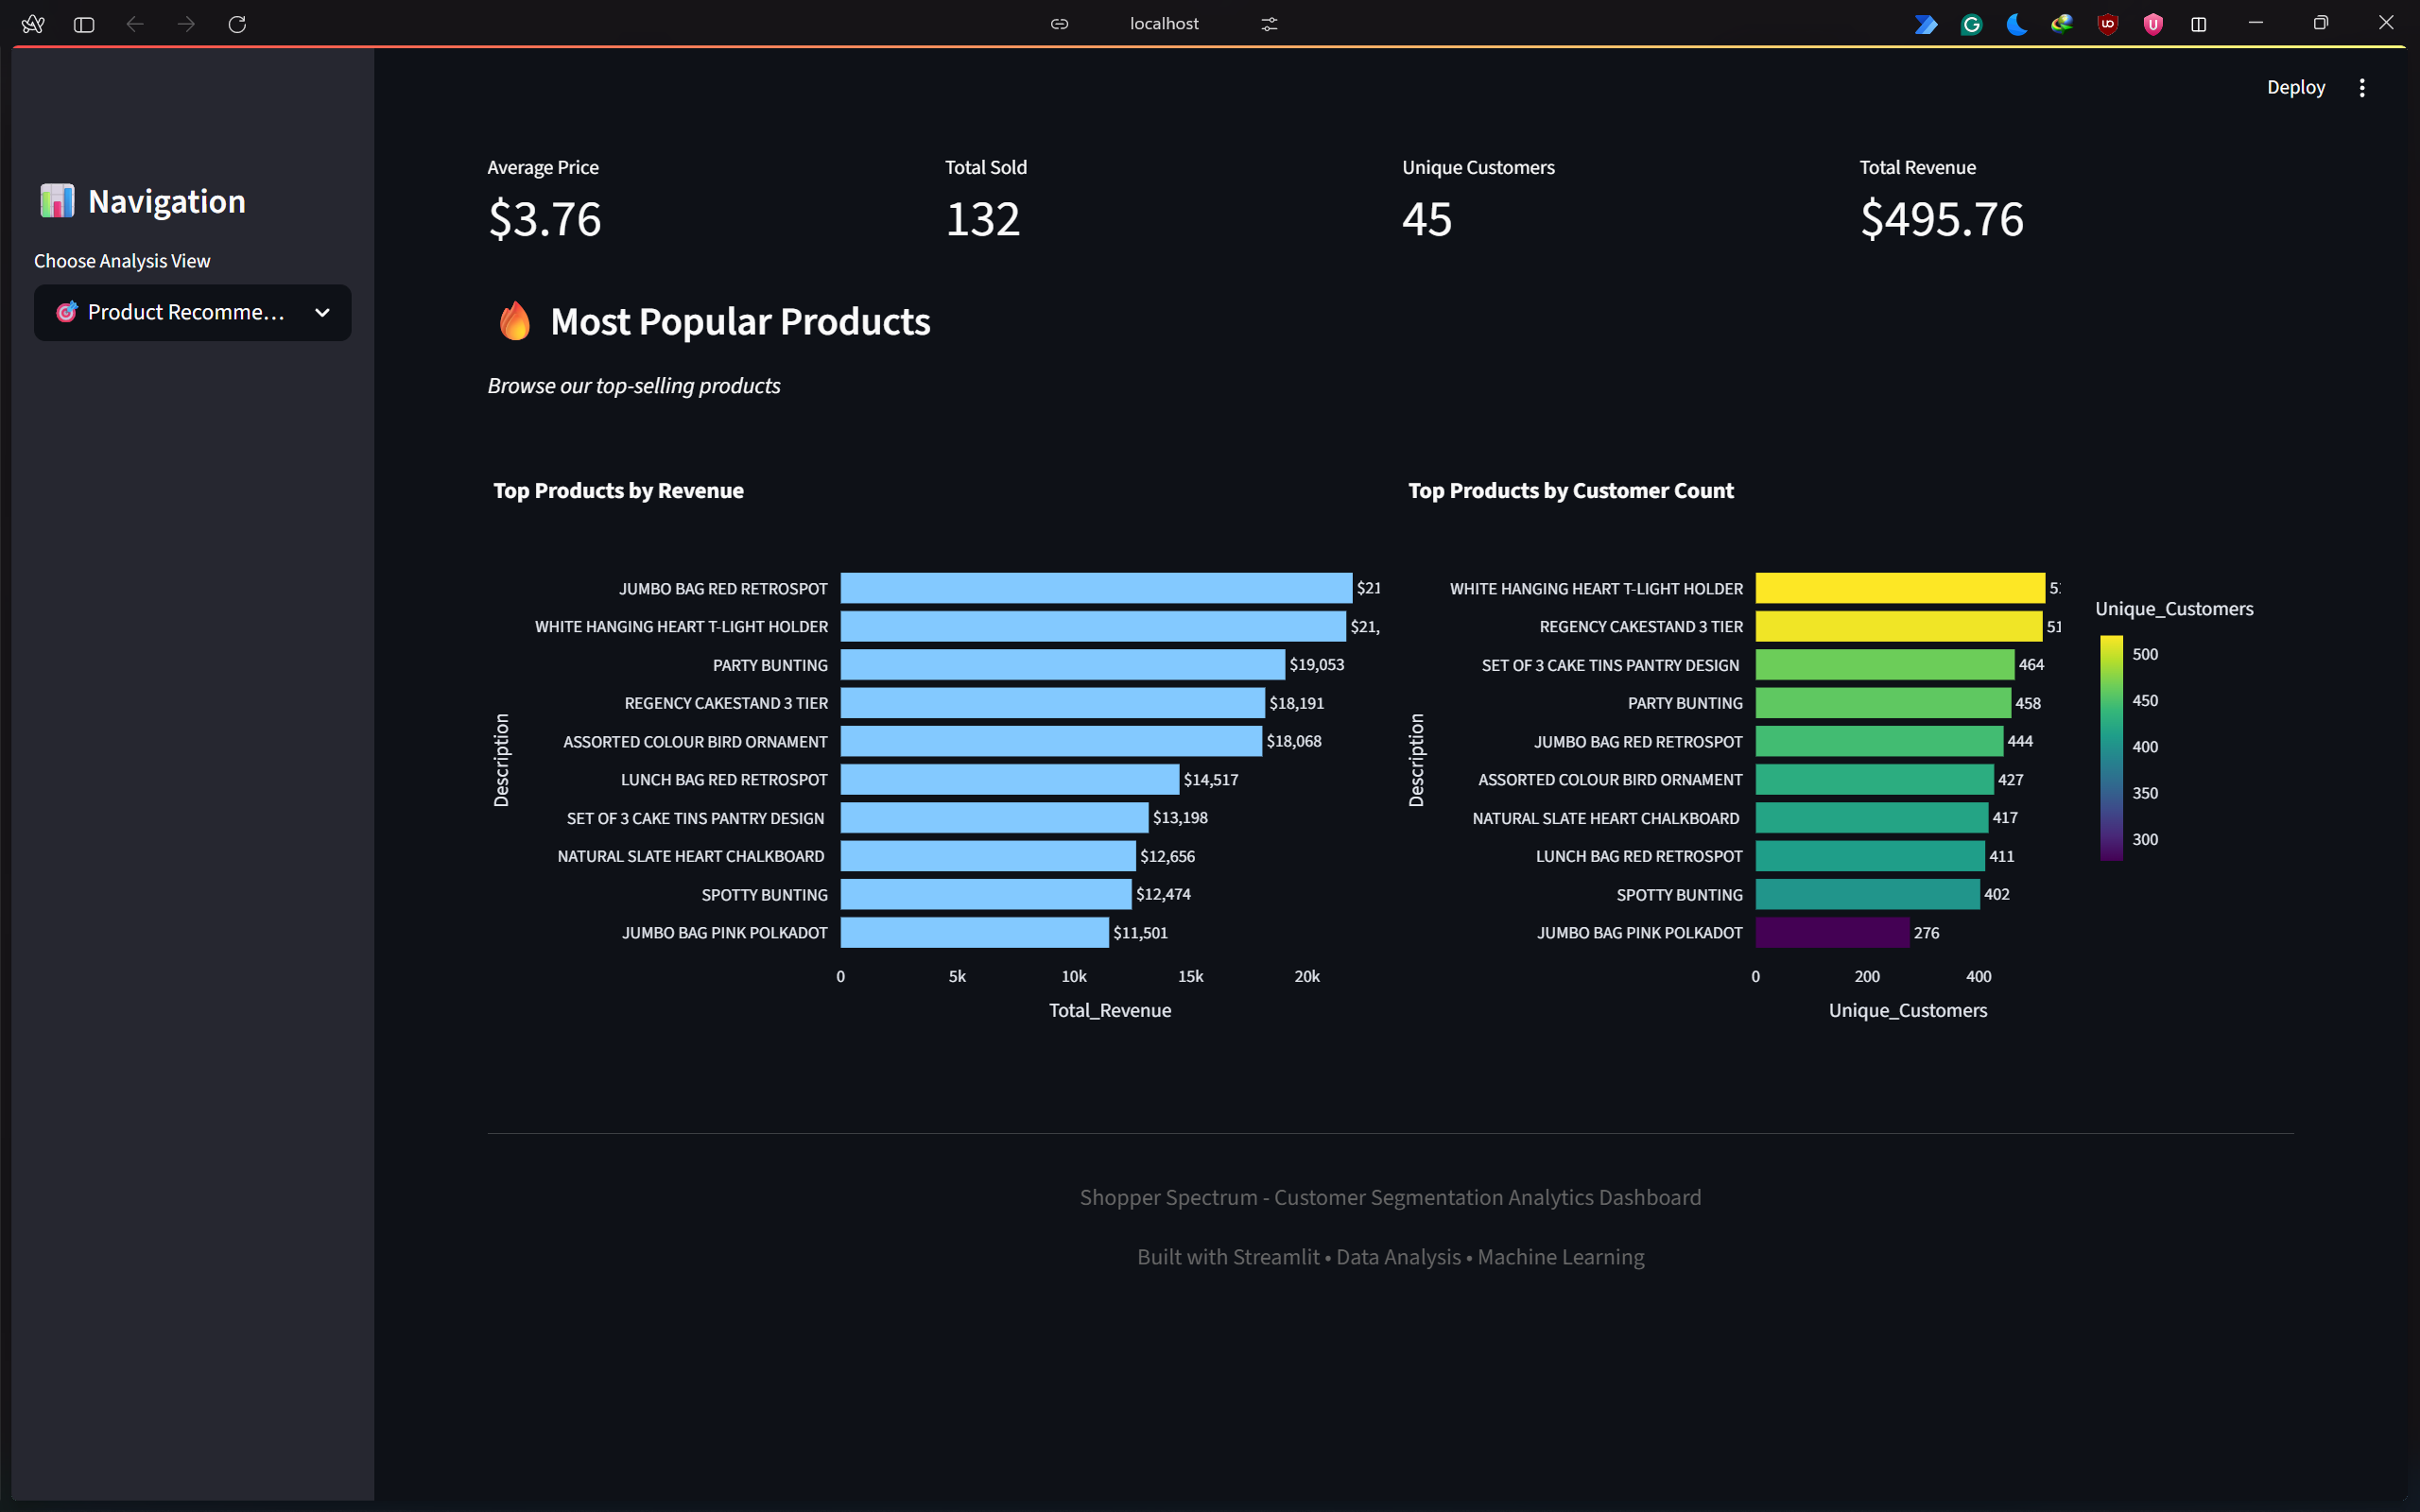

## ***11. Conclusion***

### ***What we learned from the analysis:***
#### - The average order value in the 'United Kingdom' is significantly higher than in 'Germany', indicating a potential market opportunity in Germany.
#### - Customers in 'France' purchase fewer items on average compared to those in 'Spain', suggesting a difference in shopping behavior.
#### - The average frequency of purchases by customers in 'Italy' is significantly higher than that of customers in 'Netherlands', indicating a more engaged customer base in Italy.
#### - These insights can help tailor marketing strategies and improve customer engagement across different regions.
#### - The analysis highlights the importance of understanding regional differences in customer behavior, which can inform targeted marketing campaigns and product offerings.

### ***Implementation of this analysis can lead to:***
#### - Improved marketing strategies by targeting specific customer segments based on their purchasing behavior.
#### - Enhanced customer engagement through personalized offers and promotions.
#### - Informed business decisions regarding product offerings and inventory management based on customer preferences.
#### - Increased sales and customer retention by understanding and addressing the needs of different customer segments.
#### - Better resource allocation by focusing on high-value customer segments and regions with significant growth potential.

